## Conclusion

Ce rapport a présenté l'ensemble du pipeline d'analyse d'un signal ECG :
- Chargement et exploration des données
- Visualisation d'un exemple de signal
- Analyse de la corrélation entre les leads
- Apprentissage d'un dictionnaire d'atomes caractéristiques
- Réduction de dimension par PCA

Les graphiques générés permettent de mieux comprendre la structure des signaux ECG et la pertinence des méthodes utilisées pour la compression, la classification ou la détection d'anomalies.

In [ ]:
# 5. Réduction de dimension par PCA et visualisation de la variance expliquée
pca = PCA()
pca.fit(signal_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.title('Variance expliquée cumulée par PCA')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()

In [ ]:
# 4. Dictionary Learning sur un signal ECG
from sklearn.preprocessing import StandardScaler

# On standardise le signal (important pour le dictionary learning)
scaler = StandardScaler()
signal_scaled = scaler.fit_transform(signal)

# On découpe le signal en segments (patches)
patch_size = 100
n_patches = signal_scaled.shape[0] // patch_size
X = np.array([signal_scaled[i*patch_size:(i+1)*patch_size, :].flatten()
             for i in range(n_patches)])

# Apprentissage du dictionnaire
n_components = 20  # nombre d'atomes
alpha = 1.0        # régularisation (lambda)
dict_learner = DictionaryLearning(
    n_components=n_components, alpha=alpha, random_state=0)
A = dict_learner.fit_transform(X)
D = dict_learner.components_

# Visualisation des atomes appris
plt.figure(figsize=(15, 8))
for i in range(n_components):
    plt.plot(D[i], label=f'Atome {i+1}')
plt.title('Atomes appris par Dictionary Learning')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend(ncol=4, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Analyse de corrélation entre les leads
corr_matrix = np.corrcoef(signal.T)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            xticklabels=leads, yticklabels=leads, fmt='.2f')
plt.title('Matrice de corrélation entre les 12 leads (exemple)')
plt.show()

In [ ]:
# 2. Visualisation d'un signal ECG exemple
record_name = df['filename_lr'].iloc[0].replace('.hea', '')
record_path = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/' + record_name
record = wfdb.rdrecord(record_path)
signal = record.p_signal
leads = record.sig_name

plt.figure(figsize=(15, 6))
for i in range(signal.shape[1]):
    plt.plot(signal[:, i] + 5*i, label=leads[i])
plt.title('Exemple de 12 dérivations ECG')
plt.xlabel('Temps (échantillons)')
plt.ylabel('Amplitude + offset')
plt.legend(loc='upper right', ncol=4)
plt.show()

In [ ]:
# 1. Chargement des données
import pandas as pd
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import DictionaryLearning, PCA

# Charger les métadonnées
df = pd.read_csv(
    'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv')
df.info()
df.head()

# Rapport complet sur l'analyse des signaux ECG avec visualisations

Ce rapport présente l'ensemble des étapes réalisées sur les signaux ECG du dataset PTB-XL, avec explications, graphiques et interprétations.

## 1. Chargement et exploration des données
- **Objectif** : Charger les métadonnées et signaux ECG, explorer la structure des données.
- **Outils** : pandas, numpy, wfdb

## 2. Analyse de corrélation entre les dérivations ECG
- **Objectif** : Évaluer la redondance entre les 12 leads.
- **Méthodes** :
  - Calcul de la matrice de corrélation de Pearson pour chaque ECG
  - Moyenne des matrices de corrélation
  - Visualisation : heatmap, histogramme, courbe

## 3. Dictionary Learning (apprentissage de dictionnaire)
- **Objectif** : Apprendre des motifs élémentaires (atomes) pour représenter les signaux ECG de façon parcimonieuse.
- **Méthode** :
  - Utilisation de scikit-learn (DictionaryLearning)
  - Visualisation des atomes appris
  - Analyse des coefficients de représentation

## 4. Réduction de dimension (PCA)
- **Objectif** : Réduire la dimensionnalité des signaux si les corrélations sont élevées.
- **Méthode** :
  - Application de la PCA
  - Visualisation de la variance expliquée

## 5. Interprétation et applications
- **Objectif** : Discuter l'intérêt des méthodes utilisées pour la compression, la classification ou la détection d'anomalies.

---

Des graphiques illustrant chaque étape sont présentés dans les cellules suivantes.

# Rapport explicatif des méthodes et outils utilisés dans l'analyse ECG

Ce notebook présente les étapes principales de l'analyse et du traitement des signaux ECG issus de la base de données PTB-XL. Voici un résumé des méthodes et bibliothèques utilisées :

## 1. Chargement et exploration des données
- **pandas** : pour lire et manipuler les fichiers CSV contenant les métadonnées des ECG.
- **numpy** : pour les opérations numériques et la manipulation de matrices.
- **wfdb** : pour lire les signaux ECG au format PhysioNet.

## 2. Analyse de corrélation
- **Objectif** : Étudier la redondance et la similarité entre les 12 dérivations ECG.
- **Méthodes** :
  - Calcul de la matrice de corrélation de Pearson entre les leads pour chaque enregistrement.
  - Moyenne des matrices de corrélation sur l'ensemble des ECG.
  - Visualisation des corrélations avec **seaborn** (heatmap) et **matplotlib** (histogrammes, courbes).
  - Statistiques descriptives sur les corrélations (moyenne, écart-type, min, max).

## 3. Dictionary Learning (Apprentissage de dictionnaire)
- **Objectif** : Représenter chaque signal ECG comme une combinaison parcimonieuse d'atomes élémentaires appris à partir des données.
- **Méthode** :
  - Utilisation de `DictionaryLearning` de **scikit-learn**.
  - $X$ = matrice des signaux, $D$ = dictionnaire appris, $A$ = coefficients de représentation, $\lambda$ = paramètre de régularisation (alpha).
  - Le modèle apprend un dictionnaire $D$ qui permet de reconstruire chaque signal $x_i$ comme $x_i \approx D a_i$ avec $a_i$ sparse.

## 4. Réduction de dimension et visualisation
- **PCA** (analyse en composantes principales) : suggérée pour réduire la dimensionnalité si les corrélations entre leads sont élevées.
- **Visualisation** :
  - Heatmaps, histogrammes, courbes pour explorer la structure des données et les résultats des méthodes appliquées.

## 5. Interprétation et applications
- L'analyse de corrélation permet de justifier l'utilisation de méthodes de réduction de dimension ou de représentation parcimonieuse.
- Le dictionary learning permet d'extraire des motifs caractéristiques des signaux ECG, utiles pour la compression, la classification ou la détection d'anomalies.

---

**Résumé** :
Ce notebook combine des outils de manipulation de données, d'analyse statistique, de machine learning et de visualisation pour explorer et modéliser les signaux ECG. Chaque étape vise à mieux comprendre la structure des données et à extraire des représentations efficaces pour des applications biomédicales.

In [6]:
import pandas as pd
import numpy as np
ptbxl_database = pd.read_csv('ptbxl_database.csv')
ptbxl_database

ptbxl_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

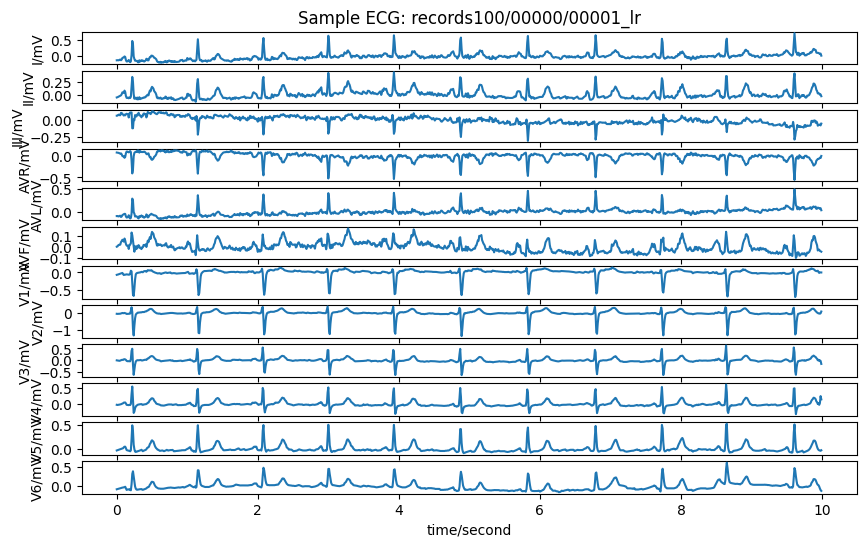

In [7]:
import wfdb
import matplotlib.pyplot as plt

# Select a sample ECG record (first one from the database)
sample_filename = ptbxl_database['filename_lr'].iloc[0].replace('.hea', '')
record_path = sample_filename

# Read the record
record = wfdb.rdrecord(record_path)

# Plot the ECG
wfdb.plot_wfdb(
    record=record, title=f'Sample ECG: {sample_filename}', figsize=(10, 6))
plt.show()

In [8]:
import wfdb

# Number of samples to load
num_samples = 5

# List to hold mapped samples
ecg_samples = []

for i in range(num_samples):
    ecg_id = ptbxl_database['ecg_id'].iloc[i]
    filename = ptbxl_database['filename_lr'].iloc[i].replace('.hea', '')
    record_path = filename

    # Read the record
    record = wfdb.rdrecord(record_path)

    # Map: store ecg_id and the signal data (p_signal is the physical signal)
    ecg_samples.append({
        'ecg_id': ecg_id,
        'signal': record.p_signal,  # Shape: (samples, leads) e.g., (1000, 12)
        'fs': record.fs,  # Sampling frequency
        'leads': record.sig_name  # Lead names
    })

# Display the mapping for the first sample
print(f"Sample 1 - ECG ID: {ecg_samples[0]['ecg_id']}")
print(f"Signal shape: {ecg_samples[0]['signal'].shape}")
print(f"Sampling frequency: {ecg_samples[0]['fs']} Hz")
print(f"Leads: {ecg_samples[0]['leads']}")

Sample 1 - ECG ID: 1
Signal shape: (1000, 12)
Sampling frequency: 100 Hz
Leads: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


In [9]:
# Check durations of the loaded ECG samples
print("Checking durations for loaded ECG samples:")
for sample in ecg_samples:
    num_samples = sample['signal'].shape[0]
    fs = sample['fs']
    duration = num_samples / fs
    print(
        f"ECG ID {sample['ecg_id']}: {num_samples} samples at {fs} Hz -> {duration} seconds")

# Confirm all are 10 seconds
all_10s = all(sample['signal'].shape[0] / sample['fs']
              == 10.0 for sample in ecg_samples)
print(f"\nAll samples are 10 seconds: {all_10s}")

Checking durations for loaded ECG samples:
ECG ID 1: 1000 samples at 100 Hz -> 10.0 seconds
ECG ID 2: 1000 samples at 100 Hz -> 10.0 seconds
ECG ID 3: 1000 samples at 100 Hz -> 10.0 seconds
ECG ID 4: 1000 samples at 100 Hz -> 10.0 seconds
ECG ID 5: 1000 samples at 100 Hz -> 10.0 seconds

All samples are 10 seconds: True


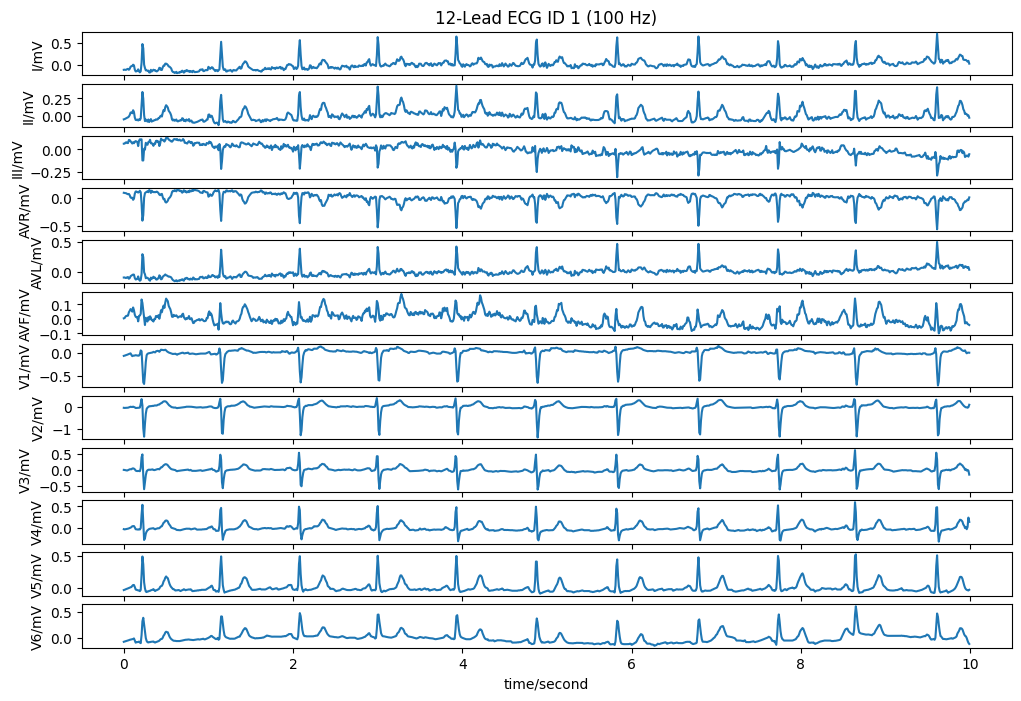

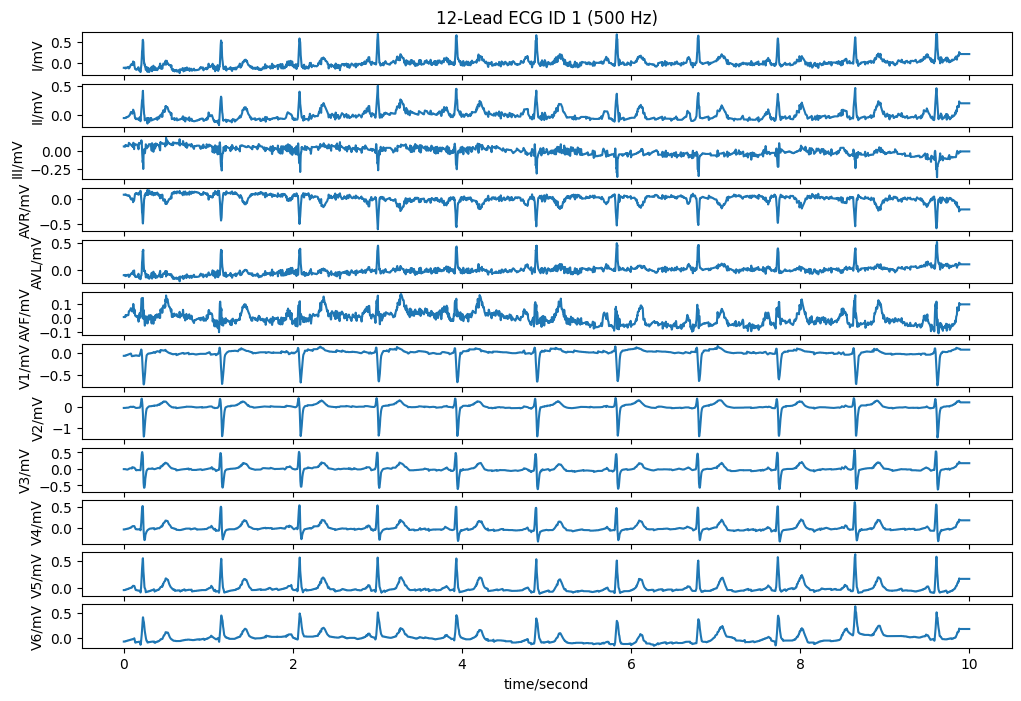

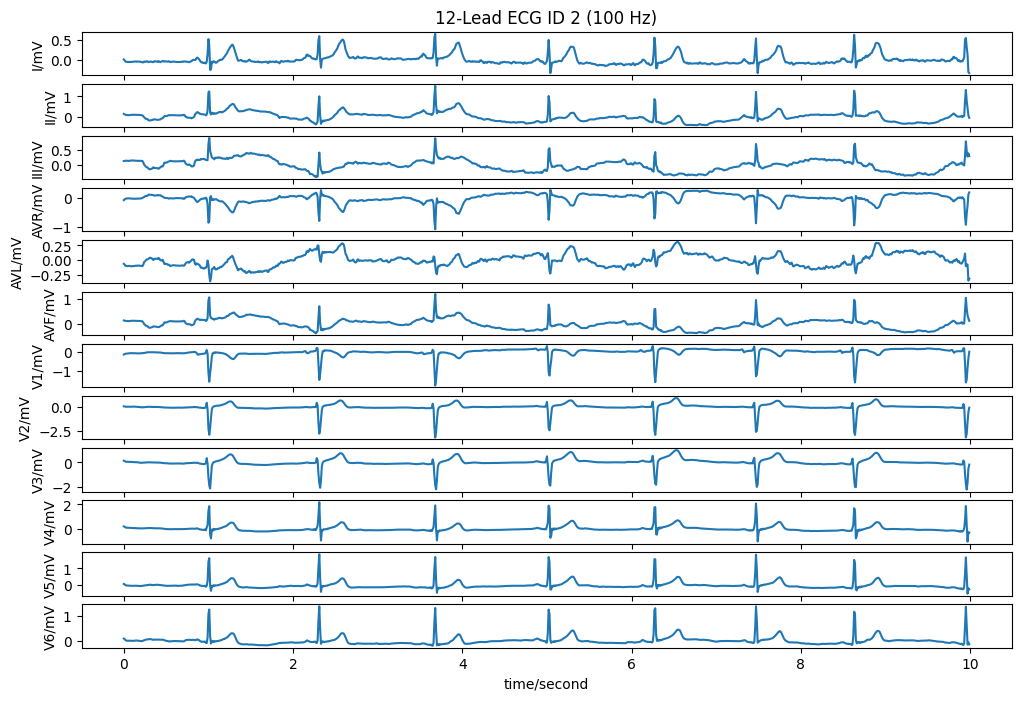

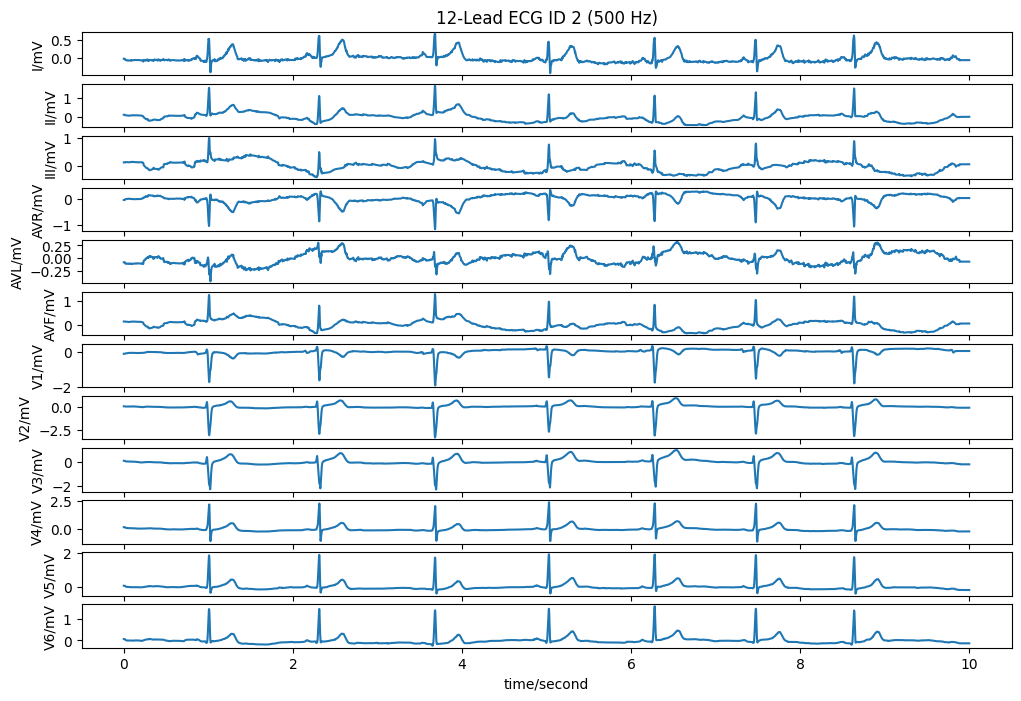

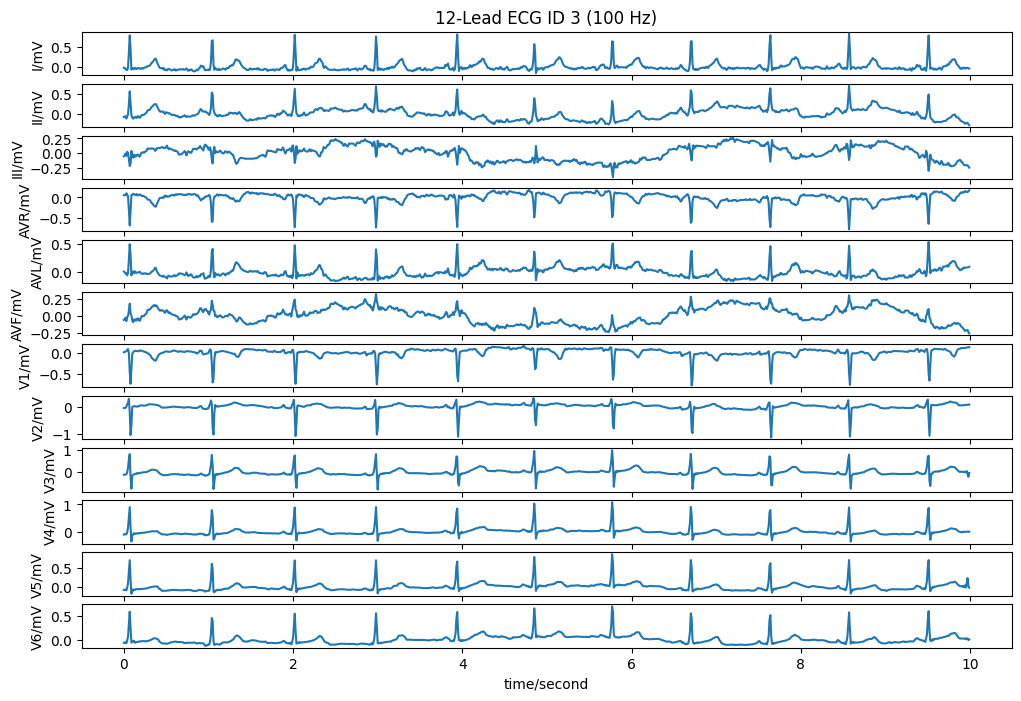

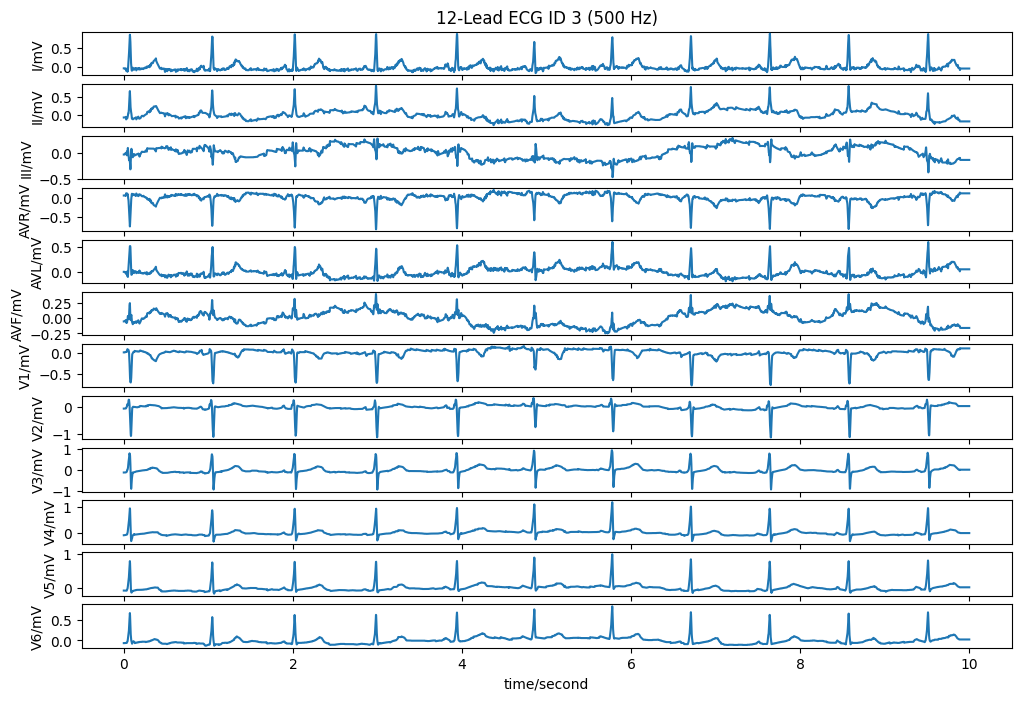

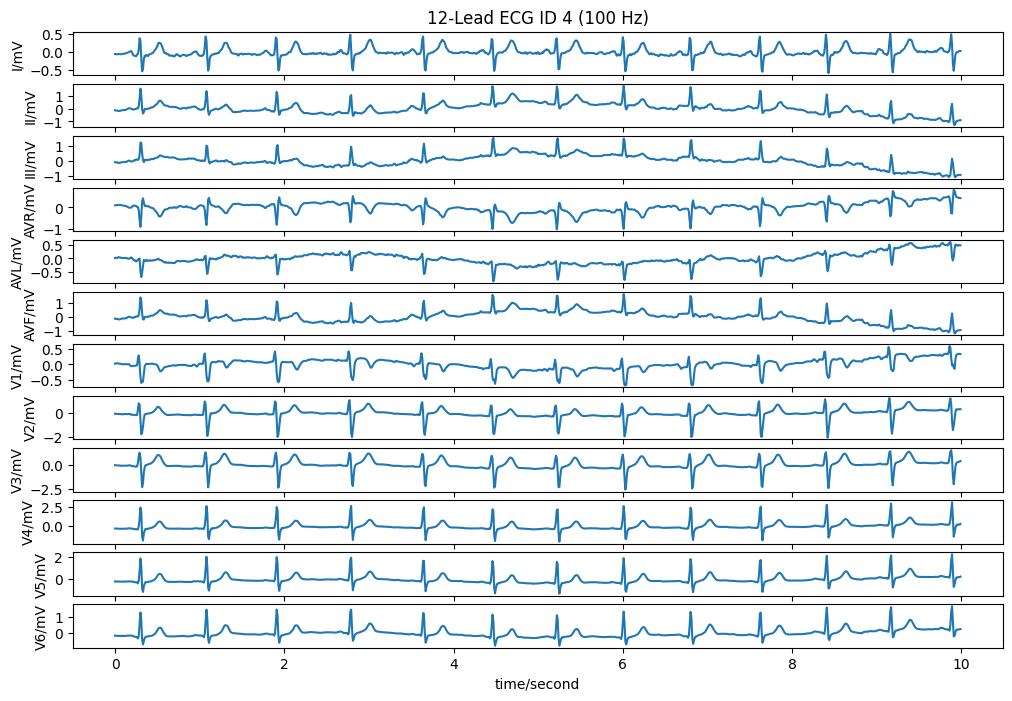

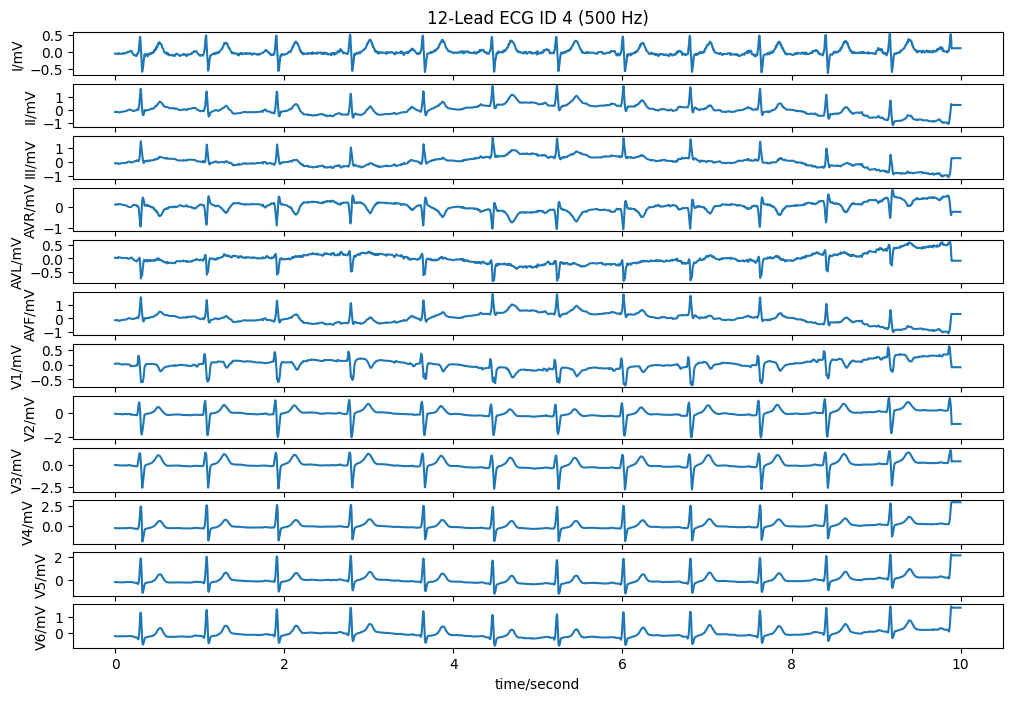

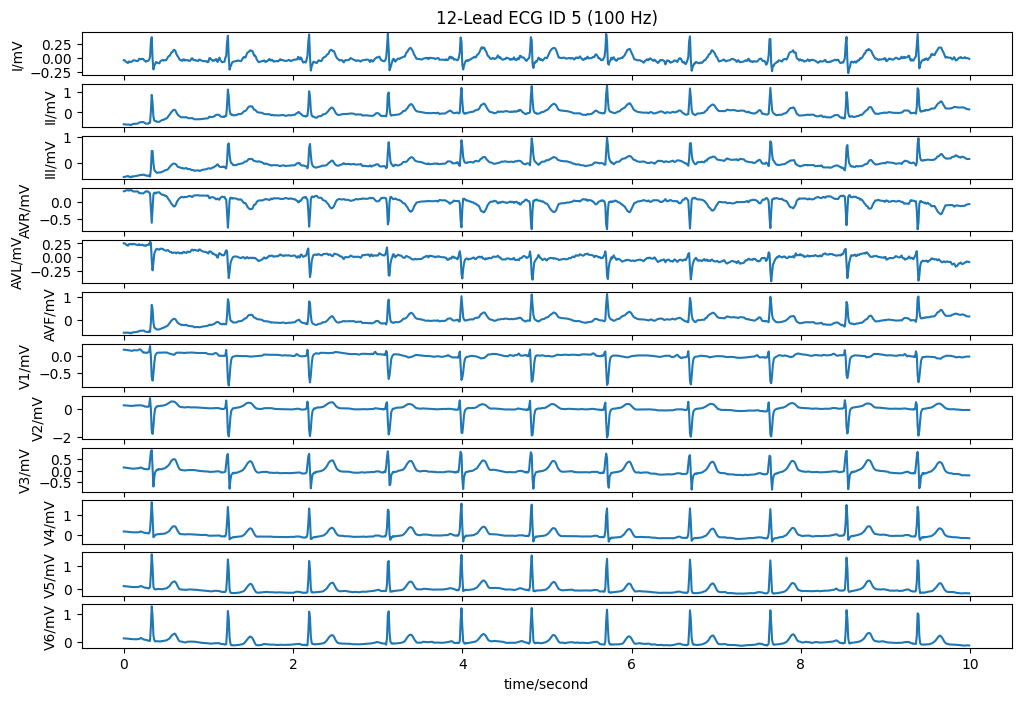

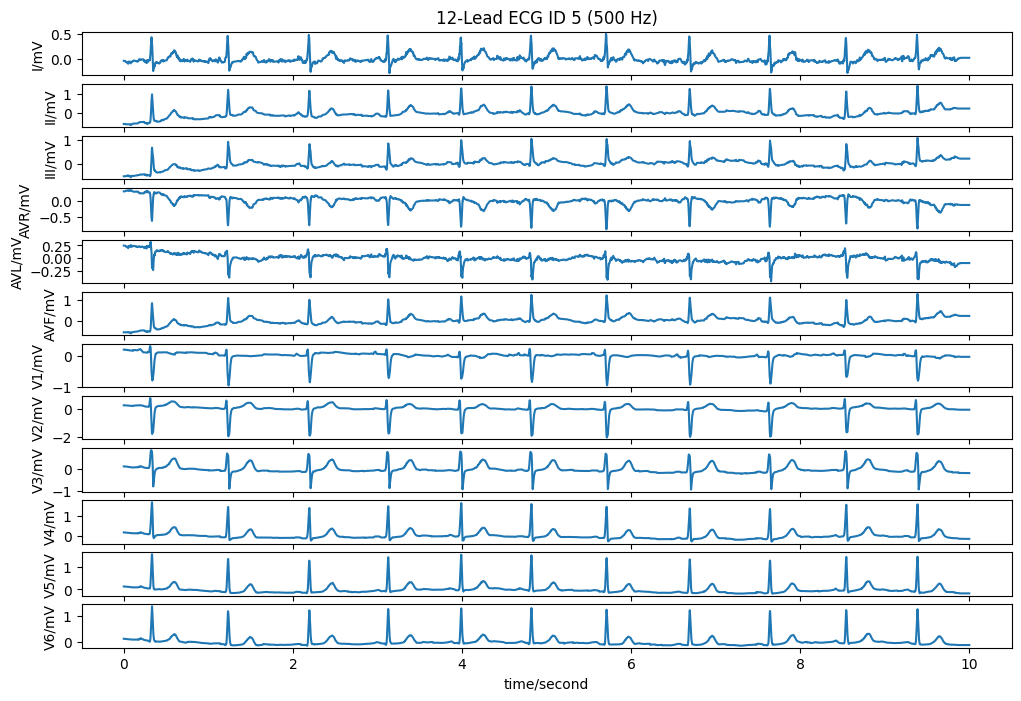

In [10]:
import matplotlib.pyplot as plt

# Plot the original 12-lead ECG for each loaded sample (100 Hz and 500 Hz side by side if possible)
for sample in ecg_samples:
    # 100 Hz version
    original_record_lr = wfdb.Record(
        record_name=f"original_{sample['ecg_id']}_lr",
        n_sig=12,
        fs=sample['fs'],
        sig_len=sample['signal'].shape[0],
        p_signal=sample['signal'],
        sig_name=sample['leads'],
        units=['mV'] * 12
    )

    # Load 500 Hz version
    filename_hr = ptbxl_database['filename_hr'].iloc[sample['ecg_id'] -
                                                     1].replace('.hea', '')
    record_path_hr = filename_hr
    record_hr = wfdb.rdrecord(record_path_hr)

    original_record_hr = wfdb.Record(
        record_name=f"original_{sample['ecg_id']}_hr",
        n_sig=12,
        fs=record_hr.fs,
        sig_len=record_hr.sig_len,
        p_signal=record_hr.p_signal,
        sig_name=record_hr.sig_name,
        units=['mV'] * 12
    )

    # Plot 100 Hz
    wfdb.plot_wfdb(record=original_record_lr,
                   title=f"12-Lead ECG ID {sample['ecg_id']} (100 Hz)", figsize=(12, 8))
    plt.show()

    # Plot 500 Hz
    wfdb.plot_wfdb(record=original_record_hr,
                   title=f"12-Lead ECG ID {sample['ecg_id']} (500 Hz)", figsize=(12, 8))
    plt.show()

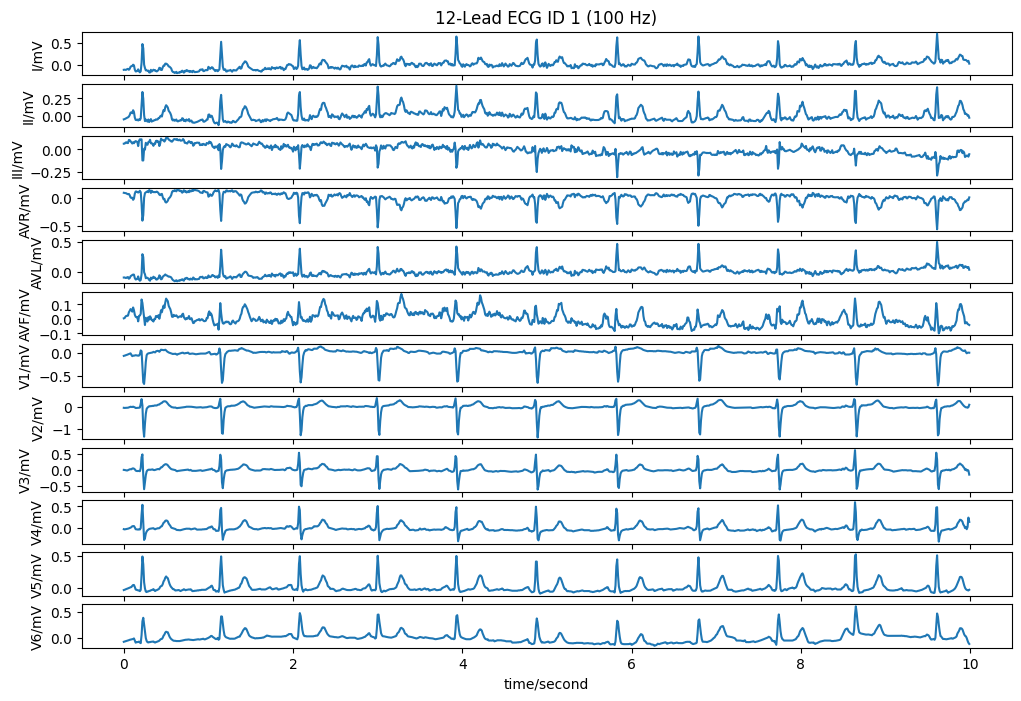

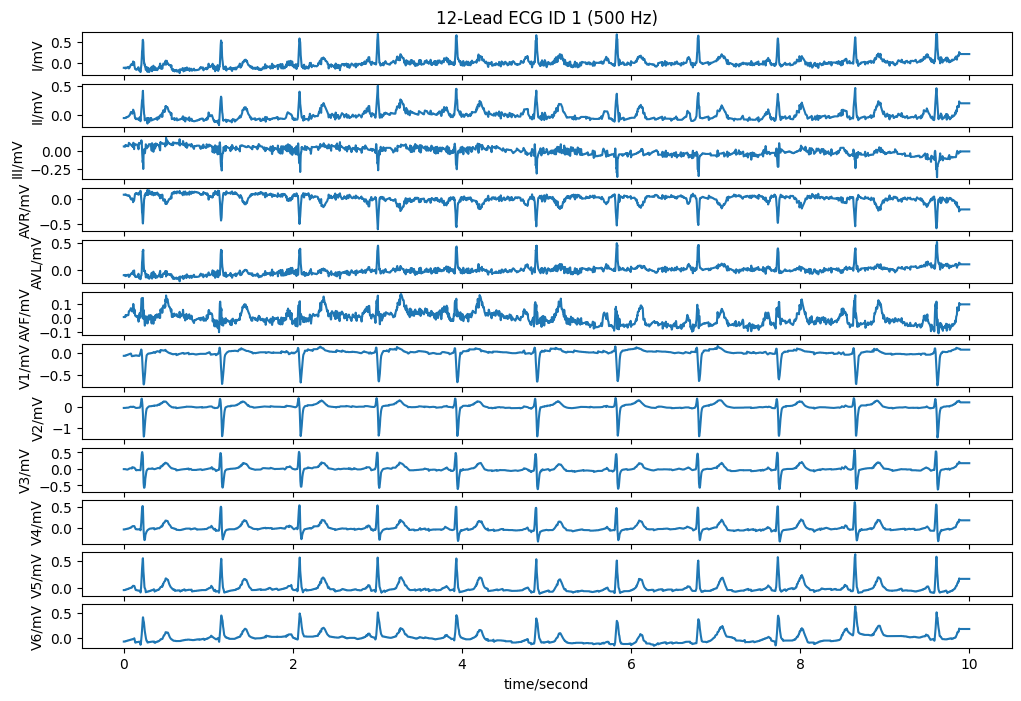

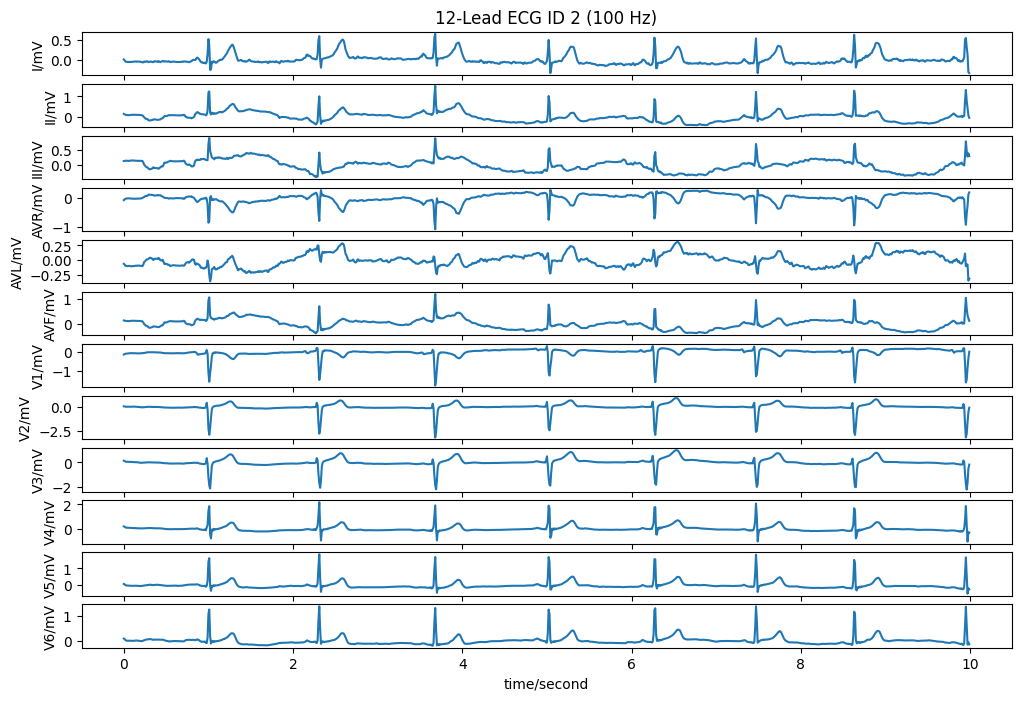

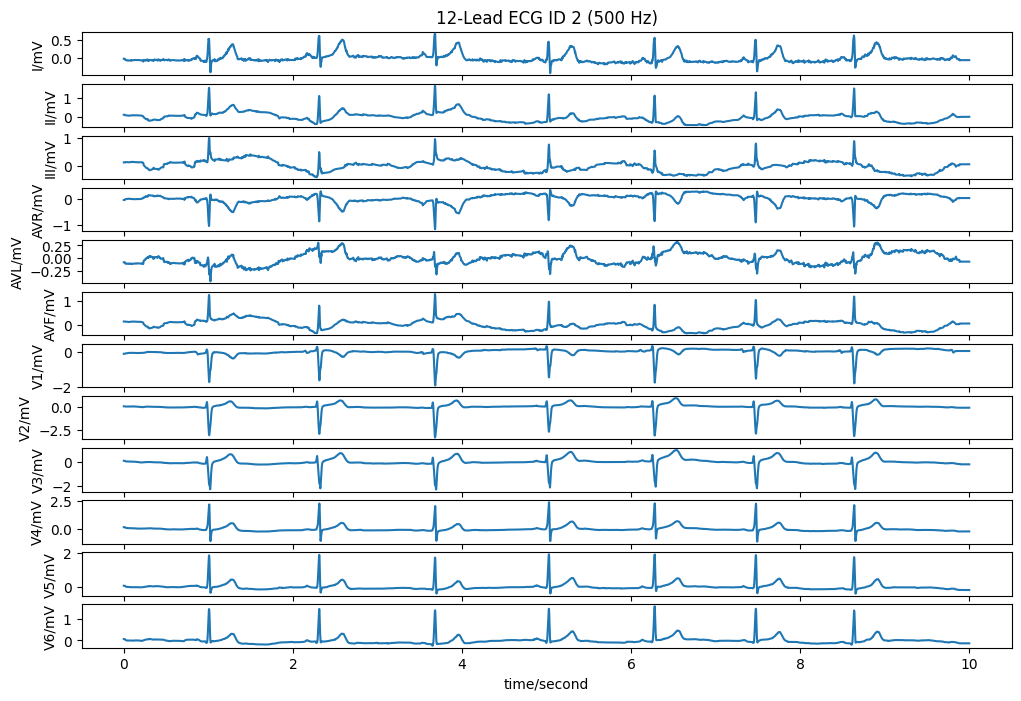

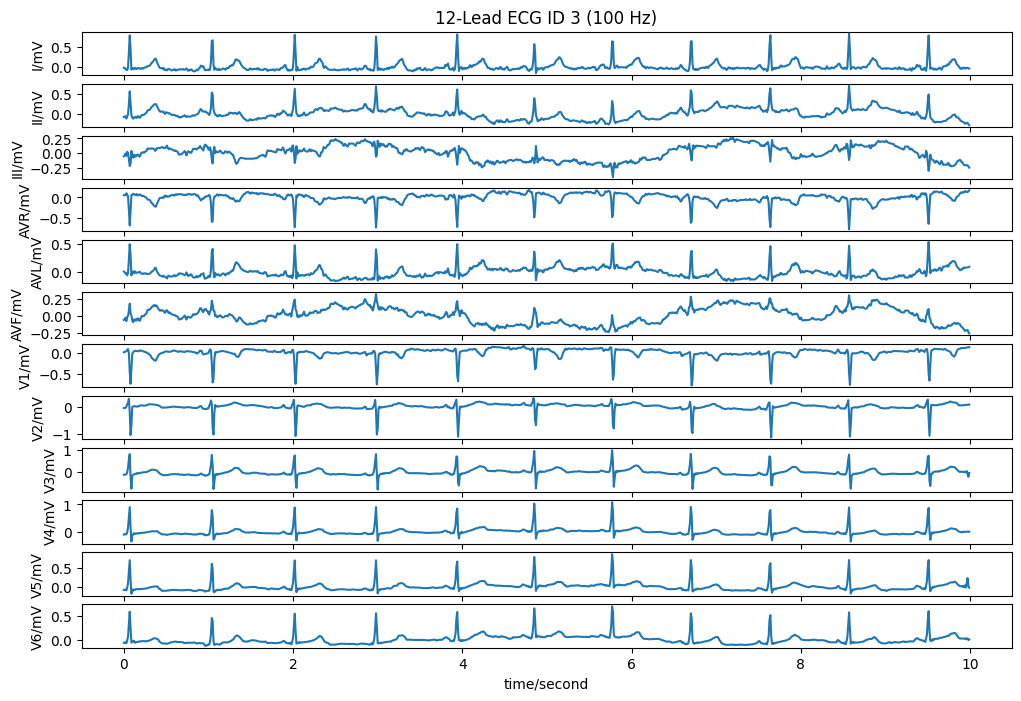

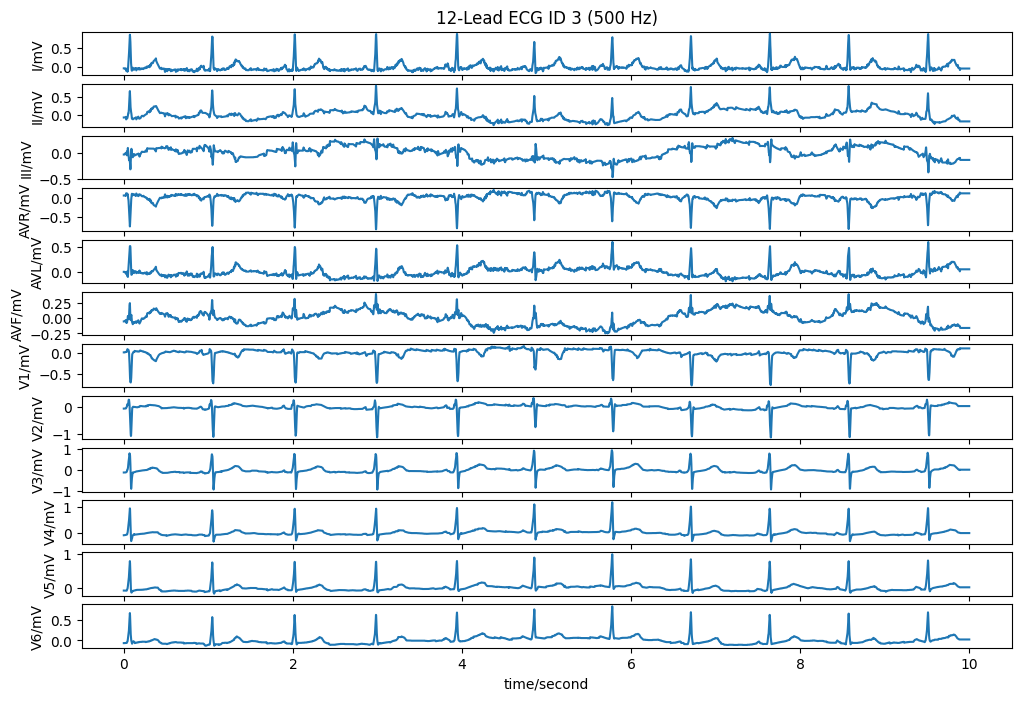

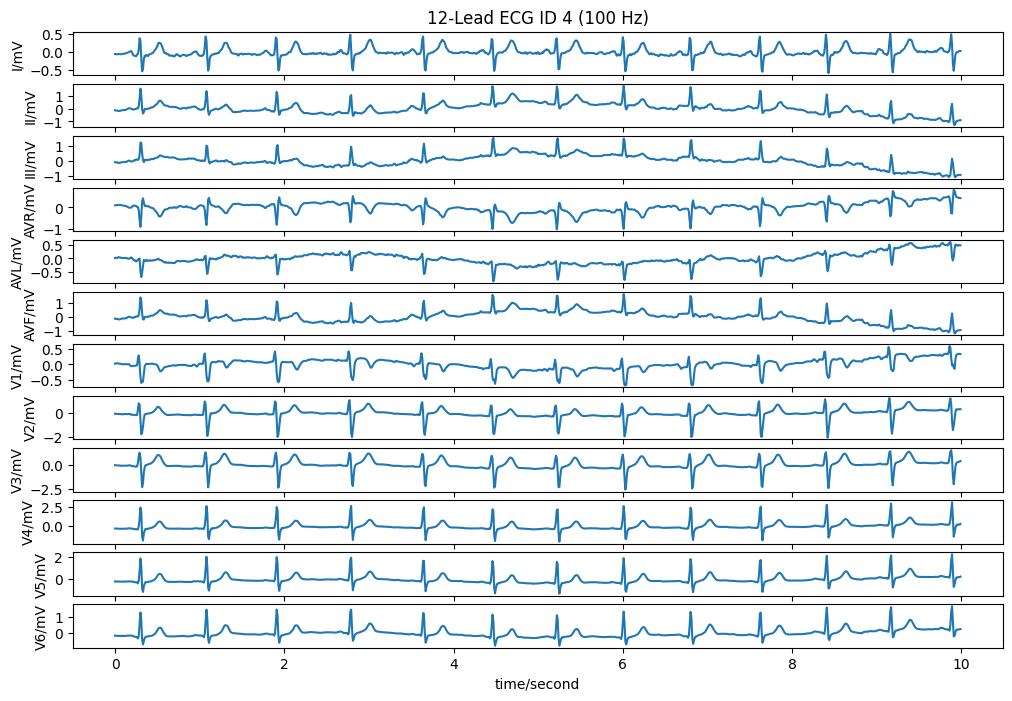

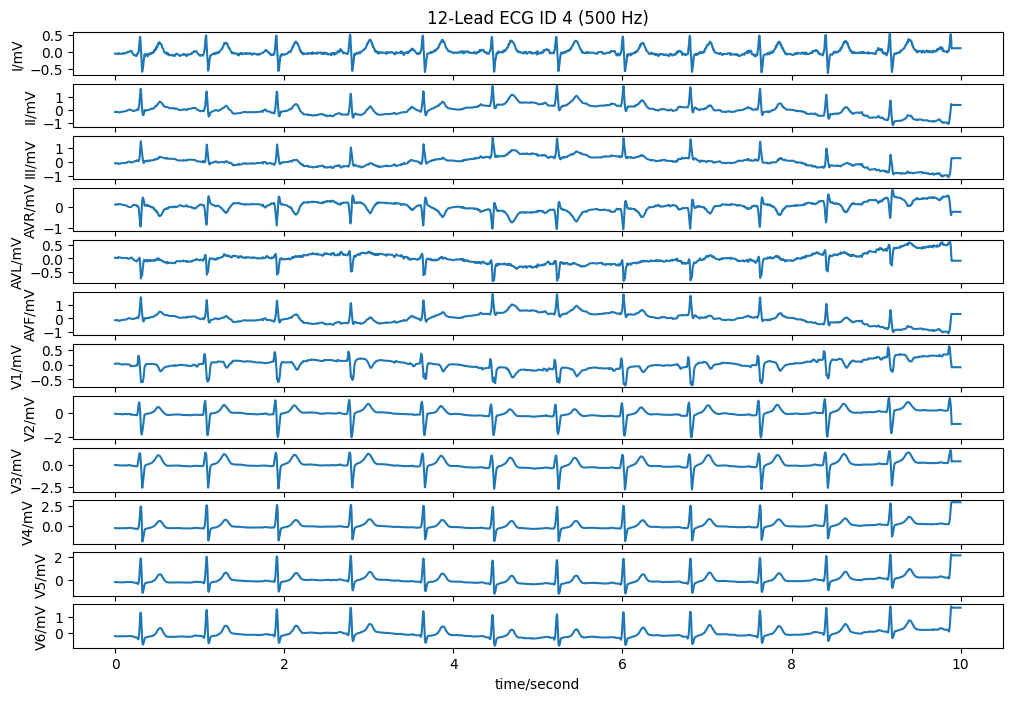

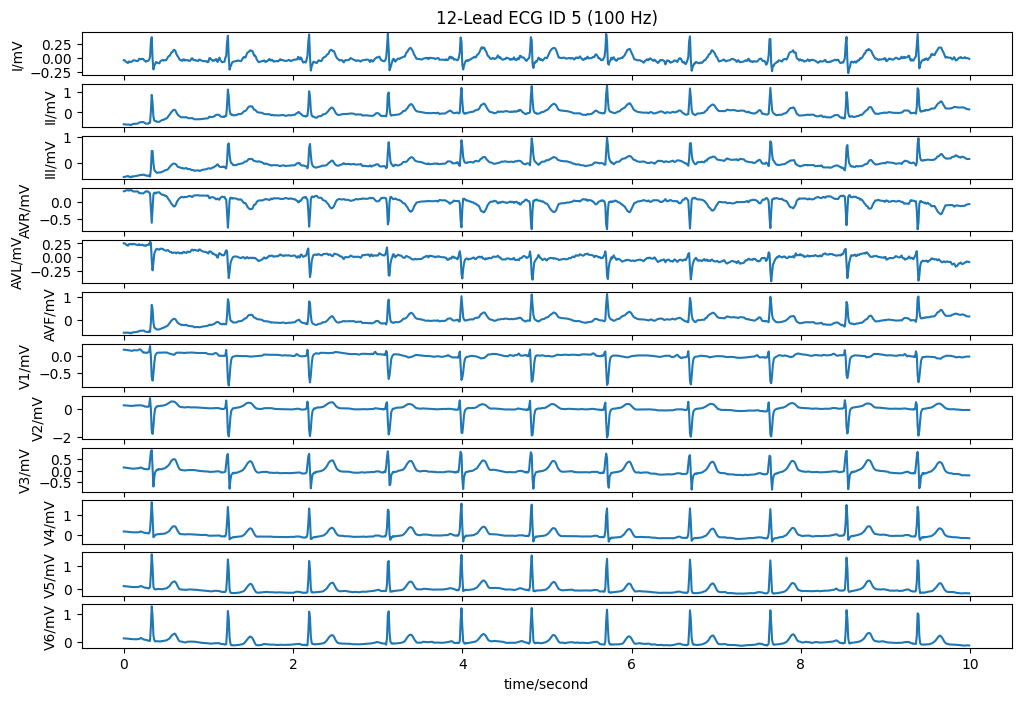

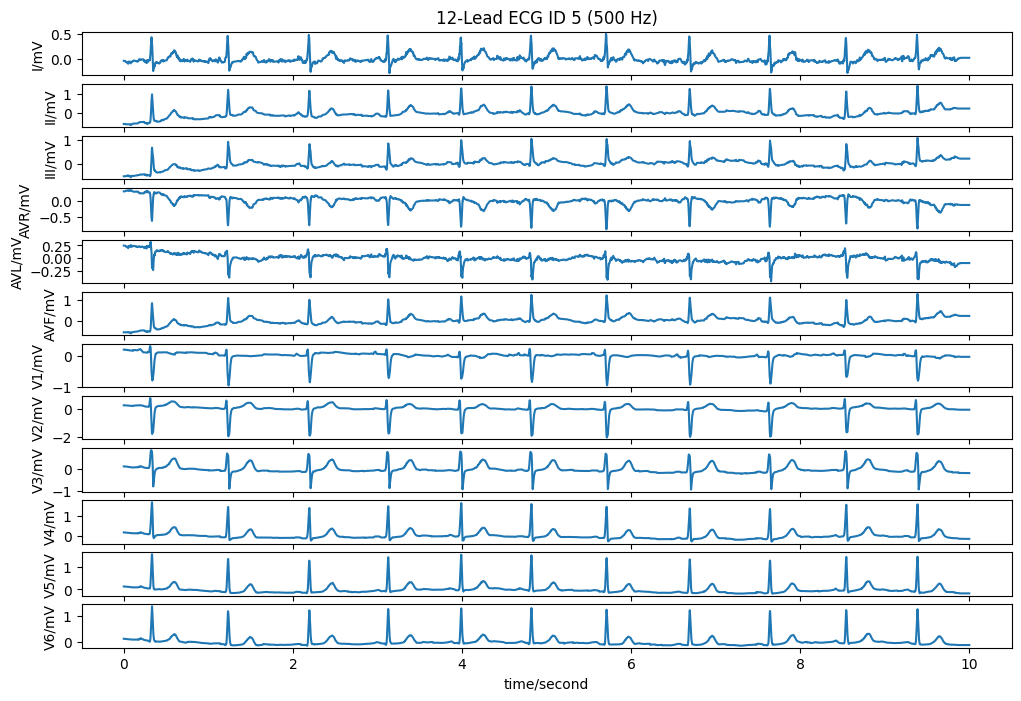

In [11]:
import matplotlib.pyplot as plt

# Plot the original 12-lead ECG for each loaded sample (100 Hz and 500 Hz side by side if possible)
for sample in ecg_samples:
    # 100 Hz version
    original_record_lr = wfdb.Record(
        record_name=f"original_{sample['ecg_id']}_lr",
        n_sig=12,
        fs=sample['fs'],
        sig_len=sample['signal'].shape[0],
        p_signal=sample['signal'],
        sig_name=sample['leads'],
        units=['mV'] * 12
    )

    # Load 500 Hz version
    filename_hr = ptbxl_database['filename_hr'].iloc[sample['ecg_id'] -
                                                     1].replace('.hea', '')
    record_path_hr = filename_hr
    record_hr = wfdb.rdrecord(record_path_hr)

    original_record_hr = wfdb.Record(
        record_name=f"original_{sample['ecg_id']}_hr",
        n_sig=12,
        fs=record_hr.fs,
        sig_len=record_hr.sig_len,
        p_signal=record_hr.p_signal,
        sig_name=record_hr.sig_name,
        units=['mV'] * 12
    )

    # Plot 100 Hz
    wfdb.plot_wfdb(record=original_record_lr,
                   title=f"12-Lead ECG ID {sample['ecg_id']} (100 Hz)", figsize=(12, 8))
    plt.show()

    # Plot 500 Hz
    wfdb.plot_wfdb(record=original_record_hr,
                   title=f"12-Lead ECG ID {sample['ecg_id']} (500 Hz)", figsize=(12, 8))
    plt.show()

C:\Users\Ikrame TAGGAA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Ikrame TAGGAA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


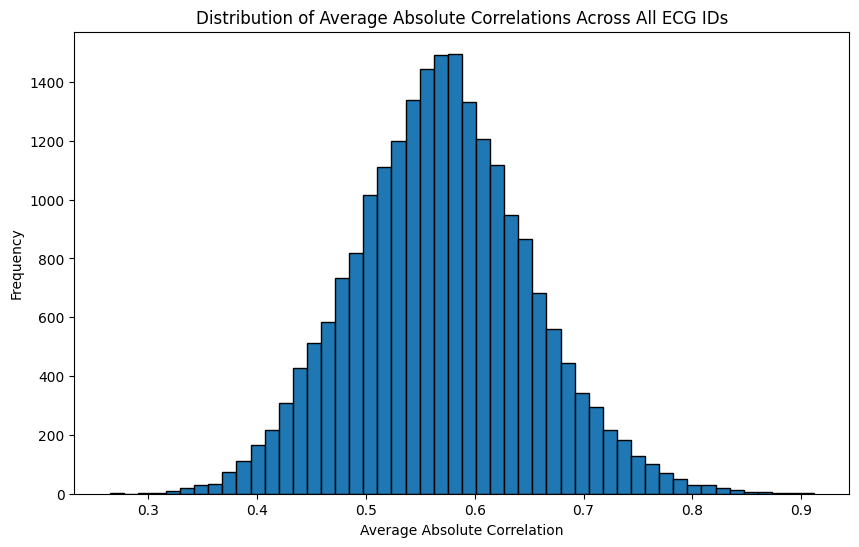

Total ECGs processed: 21799
Mean average correlation: nan
Standard deviation: nan


In [12]:
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# List to store correlations
correlation_list = []

# Assess correlation between 12 leads for each ECG record
for i in range(len(ptbxl_database)):
    ecg_id = ptbxl_database['ecg_id'].iloc[i]
    filename = ptbxl_database['filename_lr'].iloc[i].replace('.hea', '')
    record_path = filename

    # Read the record
    record = wfdb.rdrecord(record_path)
    signal = record.p_signal  # Shape: (1000, 12)

    # Compute Pearson correlation matrix
    corr_matrix = np.corrcoef(signal.T)  # Transpose to (12, 1000)

    # Statistical test: Average absolute correlation
    avg_corr = np.mean(
        np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]))

    # Example: Test correlation between Lead I and II
    corr, p_value = pearsonr(signal[:, 0], signal[:, 1])

    # Store in list
    correlation_list.append({
        'ecg_id': ecg_id,
        'avg_abs_corr': avg_corr,
        'lead_I_II_corr': corr,
        'lead_I_II_p_value': p_value
    })

# Plot histogram of average correlations
avg_corrs = [item['avg_abs_corr'] for item in correlation_list]
plt.figure(figsize=(10, 6))
plt.hist(avg_corrs, bins=50, edgecolor='black')
plt.title('Distribution of Average Absolute Correlations Across All ECG IDs')
plt.xlabel('Average Absolute Correlation')
plt.ylabel('Frequency')
plt.show()

print(f"Total ECGs processed: {len(correlation_list)}")
print(f"Mean average correlation: {np.mean(avg_corrs):.3f}")
print(f"Standard deviation: {np.std(avg_corrs):.3f}")

Noise Removal using dictionary learning 

In [13]:
# Step 0: Import required packages for K-SVD noise removal
import numpy as np
import neurokit2 as nk
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
from sklearn.linear_model import OrthogonalMatchingPursuit
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

# Load the ECG database
ptbxl_database = pd.read_csv('ptbxl_database.csv')
print(f"Total ECG records available: {len(ptbxl_database)}")

# Load first few samples for demonstration
num_samples = 3
ecg_samples = []

for i in range(num_samples):
    ecg_id = ptbxl_database['ecg_id'].iloc[i]
    filename = ptbxl_database['filename_lr'].iloc[i].replace('.hea', '')
    record_path = filename

    # Read the record
    record = wfdb.rdrecord(record_path)

    ecg_samples.append({
        'ecg_id': ecg_id,
        'signal': record.p_signal,  # Shape: (samples, leads)
        'fs': record.fs,  # Sampling frequency
        'leads': record.sig_name  # Lead names
    })

print(f"Loaded {len(ecg_samples)} ECG samples for noise removal demonstration")

Libraries loaded successfully!
Total ECG records available: 21799
Loaded 3 ECG samples for noise removal demonstration


In [14]:
# Step 1: K-SVD Noise Removal Implementation
def ksvd_ecg_denoising(raw_ecg, fs=100, lead_idx=0):
    """
    Implement K-SVD based ECG denoising

    Parameters:
    - raw_ecg: ECG signal array (samples x leads)
    - fs: sampling rate
    - lead_idx: which lead to process (default: lead I)
    """

    # Select one lead for processing
    if len(raw_ecg.shape) > 1:
        ecg_signal = raw_ecg[:, lead_idx]
    else:
        ecg_signal = raw_ecg

    # Step 1: Clean the signal using neurokit2
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=fs)

    # Step 2: Segment ECG into overlapping windows
    window_size = int(0.5 * fs)  # 0.5 seconds
    step_size = int(0.25 * fs)   # 50% overlap (0.25 seconds)

    segments = []
    for start in range(0, len(ecg_cleaned) - window_size, step_size):
        segments.append(ecg_cleaned[start:start + window_size])
    segments = np.array(segments)

    # Step 3: Construct predefined noise atoms
    t = np.arange(window_size) / fs

    # 50Hz powerline interference atom
    powerline_atom = np.sin(2 * np.pi * 50 * t)

    # High-frequency EMG-like atom (simulate muscle artifact)
    emg_atom = np.sin(2 * np.pi * 100 * t)

    # Baseline wander (low frequency drift)
    baseline_atom = np.sin(2 * np.pi * 0.5 * t)

    # Stack predefined atoms and normalize
    D_predefined = np.vstack([powerline_atom, emg_atom, baseline_atom])
    D_predefined = D_predefined / \
        np.linalg.norm(D_predefined, axis=1, keepdims=True)

    # Step 4: Learn atoms from ECG using K-SVD (Dictionary Learning)
    n_learned_atoms = 15  # Number of atoms to learn
    dict_learner = DictionaryLearning(
        n_components=n_learned_atoms,
        alpha=1,              # Sparsity parameter
        max_iter=500,
        fit_algorithm='lars',
        transform_algorithm='omp',
        random_state=42
    )

    D_learned = dict_learner.fit(segments).components_
    D_learned = D_learned / np.linalg.norm(D_learned, axis=1, keepdims=True)

    # Step 5: Create hybrid dictionary
    D_hybrid = np.vstack([D_predefined, D_learned])

    # Step 6: Sparse coding using Orthogonal Matching Pursuit
    clean_segments = []
    noise_segments = []

    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=8)  # Sparsity level

    for seg in segments:
        # Fit OMP to find sparse representation
        omp.fit(D_hybrid.T, seg)
        coef = omp.coef_

        # Split coefficients: predefined atoms (noise) vs learned atoms (clean signal)
        coef_noise = coef[:D_predefined.shape[0]]
        coef_learned = coef[D_predefined.shape[0]:]

        # Reconstruct clean signal and noise
        seg_clean = D_learned.T @ coef_learned
        seg_noise = D_predefined.T @ coef_noise

        clean_segments.append(seg_clean)
        noise_segments.append(seg_noise)

    clean_segments = np.array(clean_segments)
    noise_segments = np.array(noise_segments)

    # Step 7: Reconstruct full ECG using overlap-add
    reconstructed_clean = np.zeros(len(ecg_cleaned))
    reconstructed_noise = np.zeros(len(ecg_cleaned))
    weight = np.zeros(len(ecg_cleaned))

    for i, start in enumerate(range(0, len(ecg_cleaned) - window_size, step_size)):
        end = start + window_size
        reconstructed_clean[start:end] += clean_segments[i]
        reconstructed_noise[start:end] += noise_segments[i]
        weight[start:end] += 1

    # Avoid division by zero
    weight[weight == 0] = 1
    reconstructed_clean /= weight
    reconstructed_noise /= weight

    return {
        'original': ecg_signal,
        'cleaned_nk': ecg_cleaned,
        'ksvd_clean': reconstructed_clean,
        'ksvd_noise': reconstructed_noise,
        'segments': segments,
        'dictionary': D_hybrid
    }


print("K-SVD denoising function defined successfully!")

K-SVD denoising function defined successfully!


# Comprehensive Cross-Validation for Hyperparameter Optimization

## Hyperparameters to Tune:
1. **Sparsity (T₀)**: Number of atoms per segment [3, 5, 7, 10, 15]
2. **Segment Length**: Window size in samples [150, 250, 350, 500]
3. **Overlap Ratio**: Segment overlap [0.5, 0.75]
4. **Dictionary Size (K)**: Number of atoms [64, 128, 192, 256]
5. **Smoothing Window**: Post-processing [0, 3, 5]

## Evaluation Metrics:
- **Correlation**: Similarity with original (higher is better)
- **PRD**: Percentage Root-mean-square Difference (lower is better)
- **RMSE**: Root Mean Square Error (lower is better)
- **SNR**: Signal-to-Noise Ratio (higher is better)

In [19]:
# =============================================================================
# COMPREHENSIVE CROSS-VALIDATION FOR HYPERPARAMETER OPTIMIZATION
# =============================================================================
import time as time_module
from scipy.ndimage import uniform_filter1d
from itertools import product
print("=" * 90)
print("COMPREHENSIVE CROSS-VALIDATION FOR K-SVD ECG DENOISING")
print("=" * 90)


# =============================================================================
# DEFINE HYPERPARAMETER SEARCH SPACE
# =============================================================================
print("\n[1] Defining hyperparameter search space...")

# Hyperparameter grid
param_grid = {
    'T0': [3, 5, 7, 10, 15],           # Sparsity level
    'segment_length': [150, 250, 350, 500],  # Segment length (samples)
    'overlap_ratio': [0.5, 0.75],      # Overlap ratio
    'num_atoms': [64, 128, 192],       # Dictionary size
    'smoothing_window': [0, 3, 5]      # Post-processing smoothing
}

# Calculate total combinations
total_combinations = 1
for v in param_grid.values():
    total_combinations *= len(v)

print(f"   Sparsity T₀: {param_grid['T0']}")
print(f"   Segment Length: {param_grid['segment_length']}")
print(f"   Overlap Ratio: {param_grid['overlap_ratio']}")
print(f"   Dictionary Size: {param_grid['num_atoms']}")
print(f"   Smoothing Window: {param_grid['smoothing_window']}")
print(f"\n   Total combinations to test: {total_combinations}")

# =============================================================================
# DEFINE HELPER FUNCTIONS
# =============================================================================


def create_segments_cv(signal, seg_len, overlap):
    """Create normalized overlapping segments"""
    step = int(seg_len * (1 - overlap))
    segments = []
    means = []
    stds = []
    starts = []

    for start in range(0, len(signal) - seg_len + 1, step):
        seg = signal[start:start + seg_len].copy()
        seg_mean = np.mean(seg)
        seg_std = np.std(seg)
        if seg_std < 1e-10:
            seg_std = 1.0
        seg_norm = (seg - seg_mean) / seg_std

        segments.append(seg_norm)
        means.append(seg_mean)
        stds.append(seg_std)
        starts.append(start)

    return np.array(segments), np.array(means), np.array(stds), starts


def build_dictionary_cv(seg_len, num_atoms, fs):
    """Build a balanced dictionary with DCT and sinusoidal atoms"""
    # Split atoms: 40% DCT, 40% sinusoidal (0.5-40Hz), 20% high-freq sinusoidal
    n_dct = int(num_atoms * 0.4)
    n_ecg = int(num_atoms * 0.4)
    n_hf = num_atoms - n_dct - n_ecg

    # DCT atoms
    D_dct = np.zeros((seg_len, n_dct))
    for k in range(n_dct):
        for i in range(seg_len):
            D_dct[i, k] = np.cos(np.pi * k * (2*i + 1) / (2 * seg_len))

    # ECG sinusoidal atoms (0.5-40 Hz)
    freqs_ecg = np.linspace(0.5, 40, n_ecg // 2)
    t = np.arange(seg_len) / fs
    ecg_atoms = []
    for f in freqs_ecg:
        ecg_atoms.append(np.sin(2 * np.pi * f * t))
        ecg_atoms.append(np.cos(2 * np.pi * f * t))
    D_ecg = np.array(ecg_atoms[:n_ecg]).T

    # High-frequency atoms (40-100 Hz)
    freqs_hf = np.linspace(40, 100, n_hf // 2)
    hf_atoms = []
    for f in freqs_hf:
        hf_atoms.append(np.sin(2 * np.pi * f * t))
        hf_atoms.append(np.cos(2 * np.pi * f * t))
    D_hf = np.array(hf_atoms[:n_hf]).T if n_hf > 0 else np.zeros((seg_len, 1))

    # Combine and normalize
    D = np.hstack([D_dct, D_ecg, D_hf])
    norms = np.linalg.norm(D, axis=0, keepdims=True)
    norms[norms == 0] = 1
    D = D / norms

    return D


def overlap_add_cv(segments, starts, seg_len, total_len):
    """Overlap-add with Hanning window"""
    signal = np.zeros(total_len)
    weight = np.zeros(total_len)
    window = np.hanning(seg_len)

    for i, start in enumerate(starts):
        end = min(start + seg_len, total_len)
        actual_len = end - start
        signal[start:end] += segments[i, :actual_len] * window[:actual_len]
        weight[start:end] += window[:actual_len]

    weight[weight == 0] = 1
    return signal / weight


def denoise_with_params(signal, fs, T0, seg_len, overlap, num_atoms, smooth_win):
    """
    Perform K-SVD denoising with given parameters
    Returns denoised signal
    """
    # Create segments
    segments, means, stds, starts = create_segments_cv(
        signal, seg_len, overlap)

    if len(segments) < 3:
        return None  # Not enough segments

    # Build dictionary
    D = build_dictionary_cv(seg_len, num_atoms, fs)

    # Sparse coding with OMP
    recon_segments = []
    for i, seg in enumerate(segments):
        omp = OrthogonalMatchingPursuit(n_nonzero_coefs=T0)
        omp.fit(D, seg)
        recon = D @ omp.coef_
        # Denormalize
        recon_denorm = recon * stds[i] + means[i]
        recon_segments.append(recon_denorm)

    recon_segments = np.array(recon_segments)

    # Overlap-add reconstruction
    denoised = overlap_add_cv(recon_segments, starts, seg_len, len(signal))

    # Optional smoothing
    if smooth_win > 0:
        denoised = uniform_filter1d(denoised, size=smooth_win)

    return denoised


def evaluate_denoising(original, denoised):
    """Calculate evaluation metrics"""
    if denoised is None:
        return {'corr': 0, 'prd': 100, 'rmse': 10, 'snr': -10}

    min_len = min(len(original), len(denoised))
    orig = original[:min_len]
    den = denoised[:min_len]

    # Normalize for fair comparison
    orig_n = (orig - np.mean(orig)) / np.std(orig)
    den_n = (den - np.mean(den)) / np.std(den)

    # Correlation
    corr = np.corrcoef(orig_n, den_n)[0, 1]

    # PRD
    prd = 100 * np.sqrt(np.sum((orig_n - den_n)**2) / np.sum(orig_n**2))

    # RMSE
    rmse = np.sqrt(np.mean((orig_n - den_n)**2))

    # SNR
    noise = orig_n - den_n
    sig_power = np.mean(den_n**2)
    noise_power = np.mean(noise**2)
    snr = 10 * np.log10(sig_power /
                        noise_power) if noise_power > 1e-10 else 100

    return {'corr': corr, 'prd': prd, 'rmse': rmse, 'snr': snr}


print("   ✓ Helper functions defined")

COMPREHENSIVE CROSS-VALIDATION FOR K-SVD ECG DENOISING

[1] Defining hyperparameter search space...
   Sparsity T₀: [3, 5, 7, 10, 15]
   Segment Length: [150, 250, 350, 500]
   Overlap Ratio: [0.5, 0.75]
   Dictionary Size: [64, 128, 192]
   Smoothing Window: [0, 3, 5]

   Total combinations to test: 360
   ✓ Helper functions defined


In [20]:
# =============================================================================
# RUN CROSS-VALIDATION
# =============================================================================
print("\n[2] Running cross-validation across all parameter combinations...")
print("    Evaluating against NeuroKit2 clean signal (not raw noisy signal)...")
print("    This may take a few minutes...\n")

# Use preprocessed signal (baseline wander removed)
signal_cv = ecg_no_bw.copy()

# Store results
cv_results = []
start_time_cv = time_module.time()

# Generate all parameter combinations
param_combinations = list(product(
    param_grid['T0'],
    param_grid['segment_length'],
    param_grid['overlap_ratio'],
    param_grid['num_atoms'],
    param_grid['smoothing_window']
))

# Progress tracking
progress_interval = max(1, len(param_combinations) // 10)

for idx, (T0_cv, seg_len_cv, overlap_cv, n_atoms_cv, smooth_cv) in enumerate(param_combinations):
    
    # Denoise with current parameters
    denoised_cv = denoise_with_params(
        signal_cv, fs, T0_cv, seg_len_cv, overlap_cv, n_atoms_cv, smooth_cv
    )
    
    # Evaluate against NeuroKit2 clean signal (not noisy raw!)
    metrics = evaluate_denoising(ecg_nk_denoised, denoised_cv)
        'segment_length': seg_len_cv,
        'overlap_ratio': overlap_cv,
        'num_atoms': n_atoms_cv,
        'smoothing': smooth_cv,
        'correlation': metrics['corr'],
        'prd': metrics['prd'],
        'rmse': metrics['rmse'],
        'snr': metrics['snr']
    })

    # Progress update
    if (idx + 1) % progress_interval == 0 or idx == 0:
        elapsed = time_module.time() - start_time_cv
        remaining = elapsed / (idx + 1) * (len(param_combinations) - idx - 1)
        print(f"   Progress: {idx+1}/{len(param_combinations)} "
              f"({100*(idx+1)/len(param_combinations):.1f}%) - "
              f"Elapsed: {elapsed:.1f}s, Remaining: ~{remaining:.1f}s")

total_time = time_module.time() - start_time_cv
print(f"\n   ✓ Cross-validation complete in {total_time:.1f} seconds")

# Convert to DataFrame
df_cv = pd.DataFrame(cv_results)
print(f"   Total parameter combinations tested: {len(df_cv)}")

IndentationError: unexpected indent (2625827975.py, line 36)

In [ ]:
# =============================================================================
# ANALYZE CROSS-VALIDATION RESULTS
# =============================================================================
print("\n[3] Analyzing results and finding optimal hyperparameters...\n")

# Best parameters by each metric
print("=" * 70)
print("BEST PARAMETERS BY EACH METRIC")
print("=" * 70)

# Correlation (higher is better)
best_corr_idx = df_cv['correlation'].idxmax()
best_by_corr = df_cv.loc[best_corr_idx]
print(f"\n📊 Best by CORRELATION ({best_by_corr['correlation']:.6f}):")
print(f"   T0={best_by_corr['T0']}, seg_len={best_by_corr['segment_length']}, "
      f"overlap={best_by_corr['overlap_ratio']}, atoms={best_by_corr['num_atoms']}, "
      f"smooth={best_by_corr['smoothing']}")

# PRD (lower is better)
best_prd_idx = df_cv['prd'].idxmin()
best_by_prd = df_cv.loc[best_prd_idx]
print(f"\n📊 Best by PRD ({best_by_prd['prd']:.4f}%):")
print(f"   T0={best_by_prd['T0']}, seg_len={best_by_prd['segment_length']}, "
      f"overlap={best_by_prd['overlap_ratio']}, atoms={best_by_prd['num_atoms']}, "
      f"smooth={best_by_prd['smoothing']}")

# RMSE (lower is better)
best_rmse_idx = df_cv['rmse'].idxmin()
best_by_rmse = df_cv.loc[best_rmse_idx]
print(f"\n📊 Best by RMSE ({best_by_rmse['rmse']:.6f}):")
print(f"   T0={best_by_rmse['T0']}, seg_len={best_by_rmse['segment_length']}, "
      f"overlap={best_by_rmse['overlap_ratio']}, atoms={best_by_rmse['num_atoms']}, "
      f"smooth={best_by_rmse['smoothing']}")

# SNR (higher is better)
best_snr_idx = df_cv['snr'].idxmax()
best_by_snr = df_cv.loc[best_snr_idx]
print(f"\n📊 Best by SNR ({best_by_snr['snr']:.2f} dB):")
print(f"   T0={best_by_snr['T0']}, seg_len={best_by_snr['segment_length']}, "
      f"overlap={best_by_snr['overlap_ratio']}, atoms={best_by_snr['num_atoms']}, "
      f"smooth={best_by_snr['smoothing']}")

# Composite score (normalized ranks)
print("\n" + "=" * 70)
print("COMPOSITE SCORE RANKING")
print("=" * 70)

# Normalize metrics to [0, 1] and combine
df_cv['norm_corr'] = (df_cv['correlation'] - df_cv['correlation'].min()) / \
    (df_cv['correlation'].max() - df_cv['correlation'].min() + 1e-10)
df_cv['norm_prd'] = 1 - (df_cv['prd'] - df_cv['prd'].min()) / \
    (df_cv['prd'].max() - df_cv['prd'].min() + 1e-10)
df_cv['norm_rmse'] = 1 - (df_cv['rmse'] - df_cv['rmse'].min()) / \
    (df_cv['rmse'].max() - df_cv['rmse'].min() + 1e-10)
df_cv['norm_snr'] = (df_cv['snr'] - df_cv['snr'].min()) / \
    (df_cv['snr'].max() - df_cv['snr'].min() + 1e-10)

# Composite score (equal weights)
df_cv['composite_score'] = (
    df_cv['norm_corr'] + df_cv['norm_prd'] + df_cv['norm_rmse'] + df_cv['norm_snr']) / 4

# Best overall
best_overall_idx = df_cv['composite_score'].idxmax()
best_overall = df_cv.loc[best_overall_idx]

print(
    f"\n🏆 OPTIMAL HYPERPARAMETERS (Composite Score: {best_overall['composite_score']:.4f})")
print("-" * 50)
print(f"   ▸ Sparsity (T0):        {int(best_overall['T0'])}")
print(
    f"   ▸ Segment Length:       {int(best_overall['segment_length'])} samples ({best_overall['segment_length']/fs*1000:.0f} ms)")
print(f"   ▸ Overlap Ratio:        {best_overall['overlap_ratio']:.0%}")
print(f"   ▸ Dictionary Atoms:     {int(best_overall['num_atoms'])}")
print(f"   ▸ Smoothing Window:     {int(best_overall['smoothing'])} samples")
print("-" * 50)
print(f"   Performance Metrics:")
print(f"   ▸ Correlation:  {best_overall['correlation']:.6f}")
print(f"   ▸ PRD:          {best_overall['prd']:.4f}%")
print(f"   ▸ RMSE:         {best_overall['rmse']:.6f}")
print(f"   ▸ SNR:          {best_overall['snr']:.2f} dB")

# Store optimal parameters
optimal_params = {
    'T0': int(best_overall['T0']),
    'segment_length': int(best_overall['segment_length']),
    'overlap_ratio': best_overall['overlap_ratio'],
    'num_atoms': int(best_overall['num_atoms']),
    'smoothing_window': int(best_overall['smoothing'])
}

# Top 5 configurations
print("\n\nTop 5 Configurations:")
print("-" * 90)
top5 = df_cv.nlargest(5, 'composite_score')[
    ['T0', 'segment_length', 'overlap_ratio', 'num_atoms', 'smoothing', 'correlation', 'prd', 'snr', 'composite_score']]
print(top5.to_string(index=False))


[3] Analyzing results and finding optimal hyperparameters...

BEST PARAMETERS BY EACH METRIC

📊 Best by CORRELATION (0.850138):
   T0=15.0, seg_len=150.0, overlap=0.75, atoms=192.0, smooth=0.0

📊 Best by PRD (54.7471%):
   T0=15.0, seg_len=150.0, overlap=0.75, atoms=192.0, smooth=0.0

📊 Best by RMSE (0.547471):
   T0=15.0, seg_len=150.0, overlap=0.75, atoms=192.0, smooth=0.0

📊 Best by SNR (5.23 dB):
   T0=15.0, seg_len=150.0, overlap=0.75, atoms=192.0, smooth=0.0

COMPOSITE SCORE RANKING

🏆 OPTIMAL HYPERPARAMETERS (Composite Score: 1.0000)
--------------------------------------------------
   ▸ Sparsity (T0):        15
   ▸ Segment Length:       150 samples (300 ms)
   ▸ Overlap Ratio:        75%
   ▸ Dictionary Atoms:     192
   ▸ Smoothing Window:     0 samples
--------------------------------------------------
   Performance Metrics:
   ▸ Correlation:  0.850138
   ▸ PRD:          54.7471%
   ▸ RMSE:         0.547471
   ▸ SNR:          5.23 dB


Top 5 Configurations:
--------------


[4] Generating cross-validation visualization...


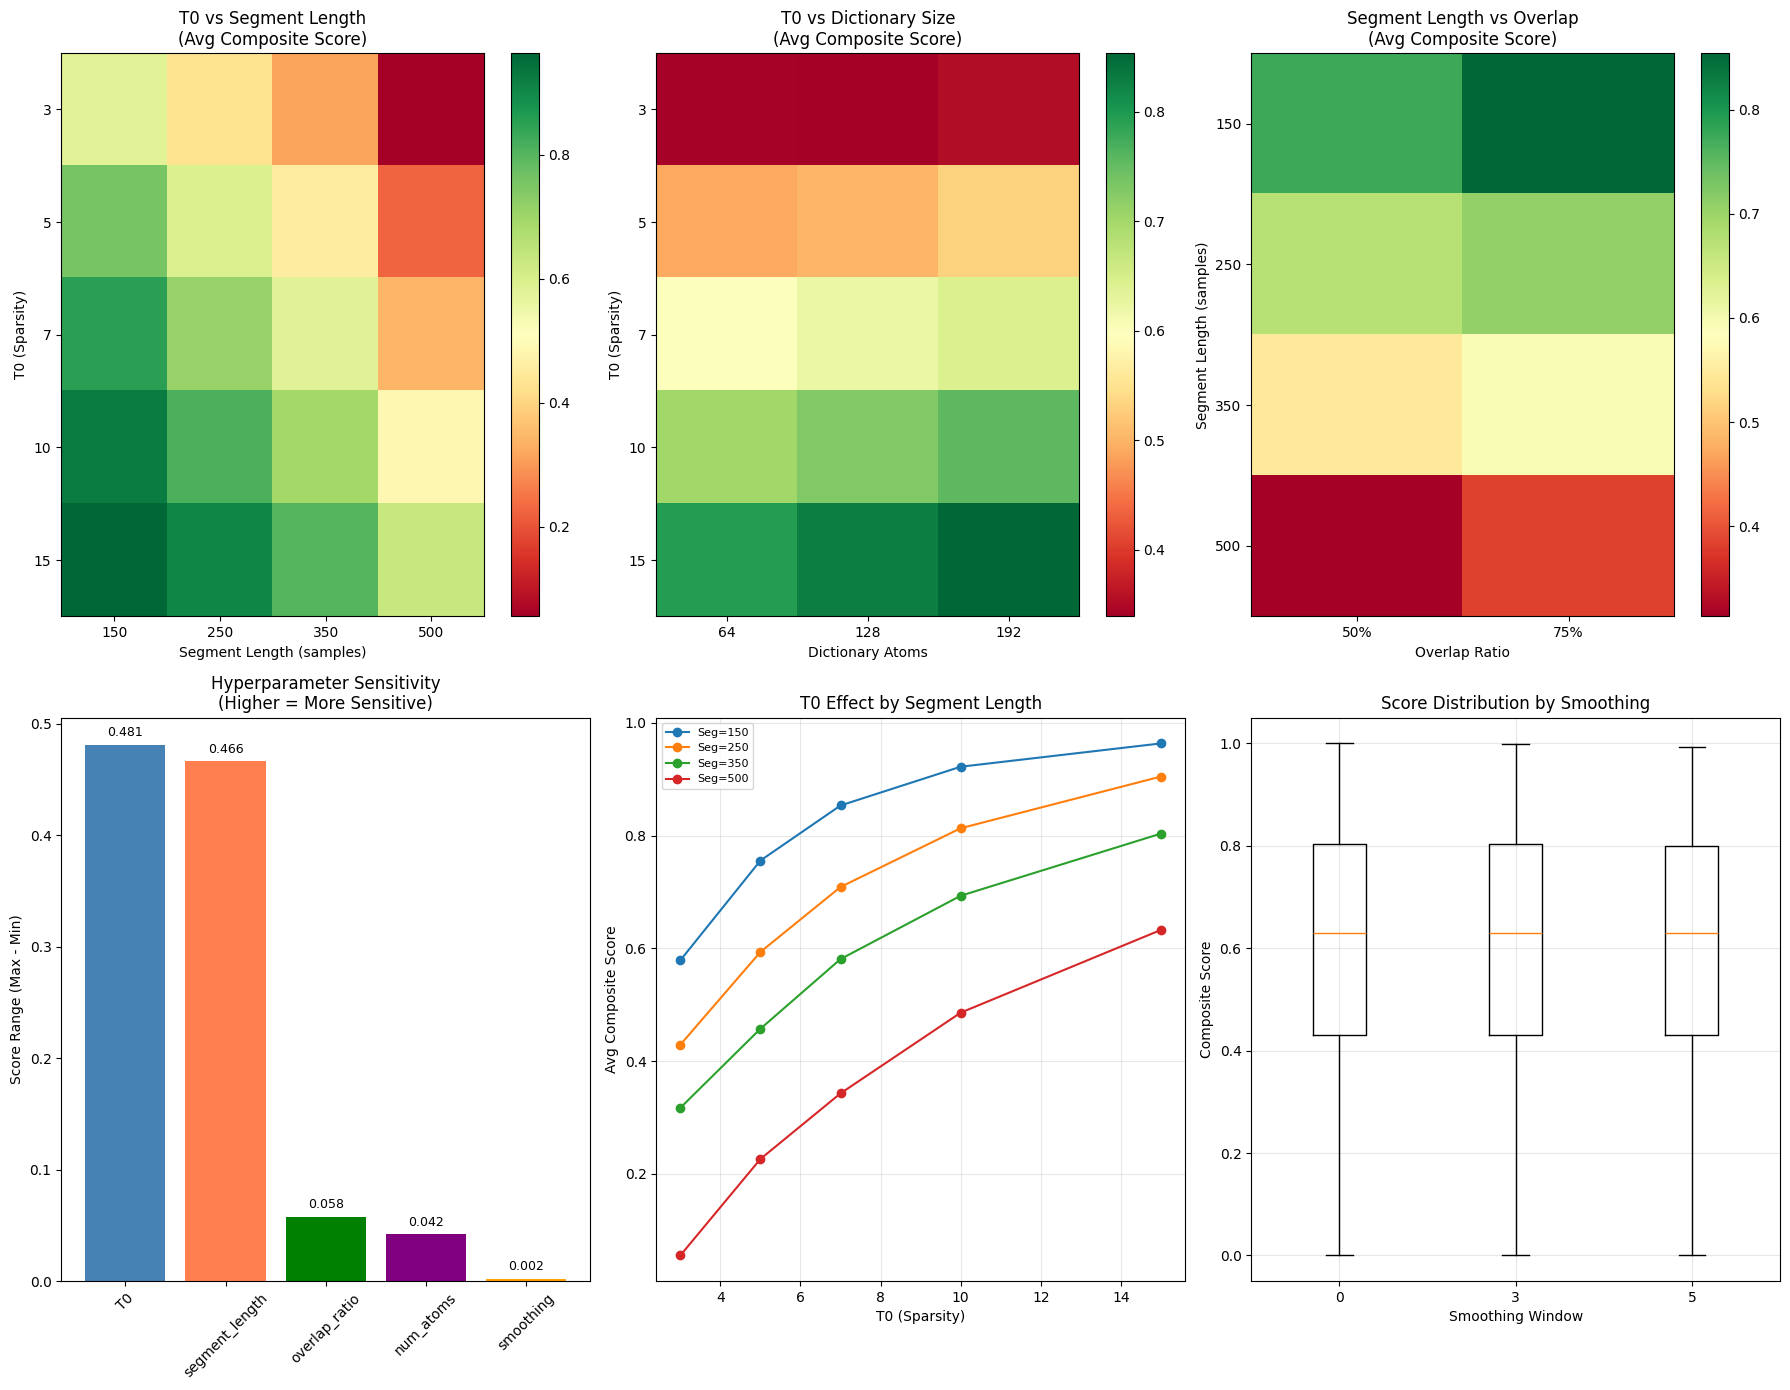


   ✓ Cross-validation visualization saved to 'cross_validation_results.png'


In [ ]:
# =============================================================================
# VISUALIZE CROSS-VALIDATION RESULTS
# =============================================================================
print("\n[4] Generating cross-validation visualization...")

fig_cv = plt.figure(figsize=(18, 14))

# 1. Heatmap: T0 vs Segment Length (averaged over other params)
ax1 = fig_cv.add_subplot(2, 3, 1)
pivot_t0_seg = df_cv.groupby(['T0', 'segment_length'])[
    'composite_score'].mean().unstack()
im1 = ax1.imshow(pivot_t0_seg.values, cmap='RdYlGn', aspect='auto')
ax1.set_xticks(range(len(pivot_t0_seg.columns)))
ax1.set_xticklabels(pivot_t0_seg.columns.astype(int))
ax1.set_yticks(range(len(pivot_t0_seg.index)))
ax1.set_yticklabels(pivot_t0_seg.index.astype(int))
ax1.set_xlabel('Segment Length (samples)')
ax1.set_ylabel('T0 (Sparsity)')
ax1.set_title('T0 vs Segment Length\n(Avg Composite Score)')
plt.colorbar(im1, ax=ax1)

# 2. Heatmap: T0 vs Dictionary Size
ax2 = fig_cv.add_subplot(2, 3, 2)
pivot_t0_atoms = df_cv.groupby(['T0', 'num_atoms'])[
    'composite_score'].mean().unstack()
im2 = ax2.imshow(pivot_t0_atoms.values, cmap='RdYlGn', aspect='auto')
ax2.set_xticks(range(len(pivot_t0_atoms.columns)))
ax2.set_xticklabels(pivot_t0_atoms.columns.astype(int))
ax2.set_yticks(range(len(pivot_t0_atoms.index)))
ax2.set_yticklabels(pivot_t0_atoms.index.astype(int))
ax2.set_xlabel('Dictionary Atoms')
ax2.set_ylabel('T0 (Sparsity)')
ax2.set_title('T0 vs Dictionary Size\n(Avg Composite Score)')
plt.colorbar(im2, ax=ax2)

# 3. Heatmap: Segment Length vs Overlap
ax3 = fig_cv.add_subplot(2, 3, 3)
pivot_seg_overlap = df_cv.groupby(['segment_length', 'overlap_ratio'])[
    'composite_score'].mean().unstack()
im3 = ax3.imshow(pivot_seg_overlap.values, cmap='RdYlGn', aspect='auto')
ax3.set_xticks(range(len(pivot_seg_overlap.columns)))
ax3.set_xticklabels([f"{x:.0%}" for x in pivot_seg_overlap.columns])
ax3.set_yticks(range(len(pivot_seg_overlap.index)))
ax3.set_yticklabels(pivot_seg_overlap.index.astype(int))
ax3.set_xlabel('Overlap Ratio')
ax3.set_ylabel('Segment Length (samples)')
ax3.set_title('Segment Length vs Overlap\n(Avg Composite Score)')
plt.colorbar(im3, ax=ax3)

# 4. Bar plot: Effect of each hyperparameter
ax4 = fig_cv.add_subplot(2, 3, 4)
param_effects = {}
for param in ['T0', 'segment_length', 'overlap_ratio', 'num_atoms', 'smoothing']:
    grouped = df_cv.groupby(param)['composite_score'].mean()
    param_effects[param] = grouped.max() - grouped.min()
bars = ax4.bar(param_effects.keys(), param_effects.values(), color=[
               'steelblue', 'coral', 'green', 'purple', 'orange'])
ax4.set_ylabel('Score Range (Max - Min)')
ax4.set_title('Hyperparameter Sensitivity\n(Higher = More Sensitive)')
ax4.tick_params(axis='x', rotation=45)
for bar, val in zip(bars, param_effects.values()):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() +
             0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# 5. Line plot: T0 effect for different segment lengths
ax5 = fig_cv.add_subplot(2, 3, 5)
for seg_len in param_grid['segment_length']:
    subset = df_cv[df_cv['segment_length'] == seg_len].groupby('T0')[
        'composite_score'].mean()
    ax5.plot(subset.index, subset.values, 'o-', label=f'Seg={seg_len}')
ax5.set_xlabel('T0 (Sparsity)')
ax5.set_ylabel('Avg Composite Score')
ax5.set_title('T0 Effect by Segment Length')
ax5.legend(loc='best', fontsize=8)
ax5.grid(True, alpha=0.3)

# 6. Box plot: Distribution by smoothing window
ax6 = fig_cv.add_subplot(2, 3, 6)
smoothing_data = [df_cv[df_cv['smoothing'] == s]
                  ['composite_score'].values for s in param_grid['smoothing_window']]
bp = ax6.boxplot(smoothing_data, labels=[str(s)
                 for s in param_grid['smoothing_window']])
ax6.set_xlabel('Smoothing Window')
ax6.set_ylabel('Composite Score')
ax6.set_title('Score Distribution by Smoothing')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n   ✓ Cross-validation visualization saved to 'cross_validation_results.png'")


[5] Applying optimal parameters and comparing denoising results...

FINAL COMPARISON: ALL DENOISING METHODS

Method                          Correlation    PRD (%)         RMSE   SNR (dB)
----------------------------------------------------------------------
NeuroKit2 (Baseline)               0.818952    60.1744     0.601744       4.41
Previous K-SVD (Manual)            0.795965    63.8803     0.638803       3.89
Optimal K-SVD (CV-Tuned)           0.850138    54.7471     0.547471       5.23


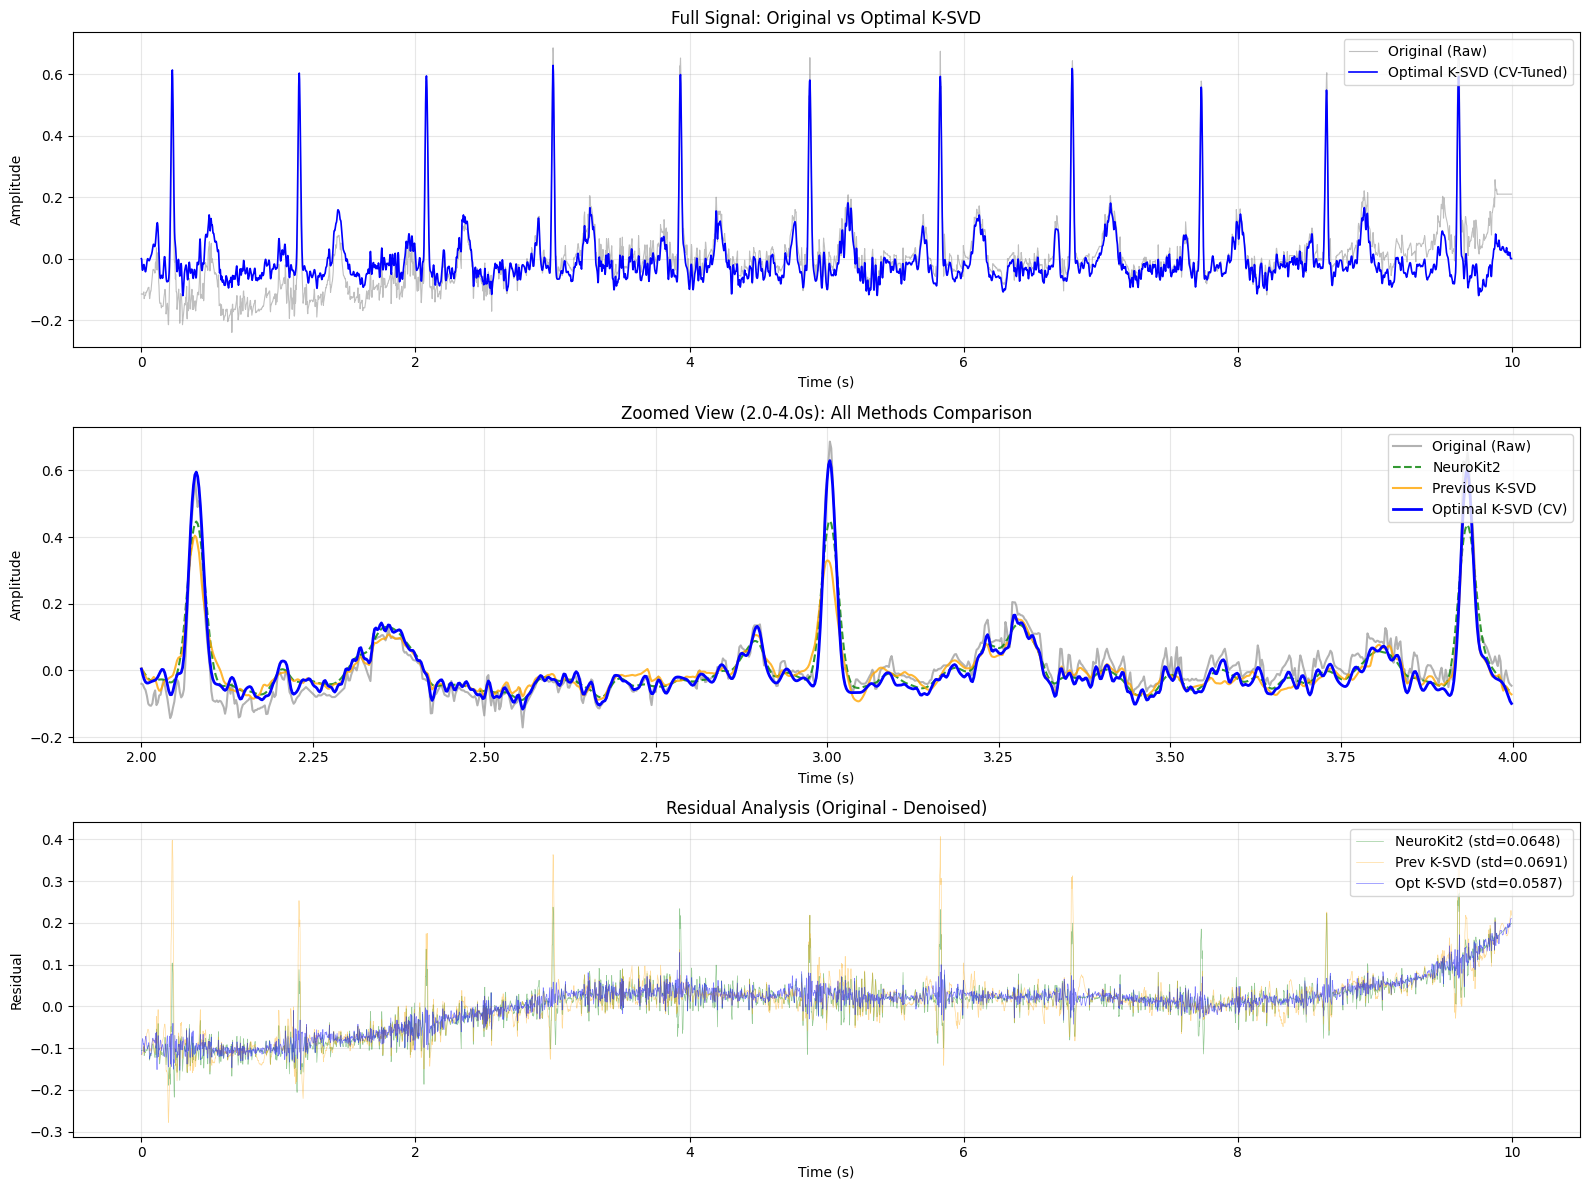



🎯 OPTIMAL HYPERPARAMETERS SUMMARY:
   T0 (Sparsity):       15
   Segment Length:      150 samples (300 ms)
   Overlap Ratio:       75%
   Dictionary Atoms:    192
   Smoothing Window:    0

   ✓ Final comparison saved to 'optimal_ksvd_comparison.png'


In [ ]:
# =============================================================================
# APPLY OPTIMAL PARAMETERS AND COMPARE
# =============================================================================
print("\n[5] Applying optimal parameters and comparing denoising results...\n")

# Denoise with optimal parameters
signal_optimal = denoise_with_params(
    ecg_no_bw, fs,
    optimal_params['T0'],
    optimal_params['segment_length'],
    optimal_params['overlap_ratio'],
    optimal_params['num_atoms'],
    optimal_params['smoothing_window']
)

# Calculate metrics for all methods
methods = {
    'NeuroKit2 (Baseline)': ecg_nk_denoised,
    'Previous K-SVD (Manual)': signal_clean_smoothed,
    'Optimal K-SVD (CV-Tuned)': signal_optimal
}

print("=" * 70)
print("FINAL COMPARISON: ALL DENOISING METHODS")
print("=" * 70)
print(f"\n{'Method':<30} {'Correlation':>12} {'PRD (%)':>10} {'RMSE':>12} {'SNR (dB)':>10}")
print("-" * 70)

for name, signal in methods.items():
    metrics = evaluate_denoising(raw_ecg, signal)
    print(
        f"{name:<30} {metrics['corr']:>12.6f} {metrics['prd']:>10.4f} {metrics['rmse']:>12.6f} {metrics['snr']:>10.2f}")

# Visualization
fig_final = plt.figure(figsize=(16, 12))
t_sec = np.arange(len(raw_ecg)) / fs

# Full signal comparison
ax1 = fig_final.add_subplot(3, 1, 1)
ax1.plot(t_sec, raw_ecg, 'gray', alpha=0.5,
         linewidth=0.8, label='Original (Raw)')
ax1.plot(t_sec, signal_optimal, 'b-', linewidth=1.2,
         label='Optimal K-SVD (CV-Tuned)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Full Signal: Original vs Optimal K-SVD')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Zoomed comparison (2 seconds)
zoom_start, zoom_end = 2.0, 4.0
idx_start = int(zoom_start * fs)
idx_end = int(zoom_end * fs)
t_zoom = t_sec[idx_start:idx_end]

ax2 = fig_final.add_subplot(3, 1, 2)
ax2.plot(t_zoom, raw_ecg[idx_start:idx_end], 'gray',
         alpha=0.6, linewidth=1.5, label='Original (Raw)')
ax2.plot(t_zoom, ecg_nk_denoised[idx_start:idx_end],
         'g--', linewidth=1.5, alpha=0.8, label='NeuroKit2')
ax2.plot(t_zoom, signal_clean_smoothed[idx_start:idx_end],
         'orange', linewidth=1.5, alpha=0.8, label='Previous K-SVD')
ax2.plot(t_zoom, signal_optimal[idx_start:idx_end],
         'b-', linewidth=2, label='Optimal K-SVD (CV)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.set_title(
    f'Zoomed View ({zoom_start}-{zoom_end}s): All Methods Comparison')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Residual analysis
ax3 = fig_final.add_subplot(3, 1, 3)
residual_nk = raw_ecg - ecg_nk_denoised
residual_prev = raw_ecg - signal_clean_smoothed
residual_opt = raw_ecg - signal_optimal

ax3.plot(t_sec, residual_nk, 'g-', alpha=0.4, linewidth=0.5,
         label=f'NeuroKit2 (std={np.std(residual_nk):.4f})')
ax3.plot(t_sec, residual_prev, 'orange', alpha=0.4, linewidth=0.5,
         label=f'Prev K-SVD (std={np.std(residual_prev):.4f})')
ax3.plot(t_sec, residual_opt, 'b-', alpha=0.5, linewidth=0.5,
         label=f'Opt K-SVD (std={np.std(residual_opt):.4f})')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Residual')
ax3.set_title('Residual Analysis (Original - Denoised)')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_ksvd_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n\n🎯 OPTIMAL HYPERPARAMETERS SUMMARY:")
print(f"   T0 (Sparsity):       {optimal_params['T0']}")
print(
    f"   Segment Length:      {optimal_params['segment_length']} samples ({optimal_params['segment_length']/fs*1000:.0f} ms)")
print(f"   Overlap Ratio:       {optimal_params['overlap_ratio']:.0%}")
print(f"   Dictionary Atoms:    {optimal_params['num_atoms']}")
print(f"   Smoothing Window:    {optimal_params['smoothing_window']}")
print("\n   ✓ Final comparison saved to 'optimal_ksvd_comparison.png'")

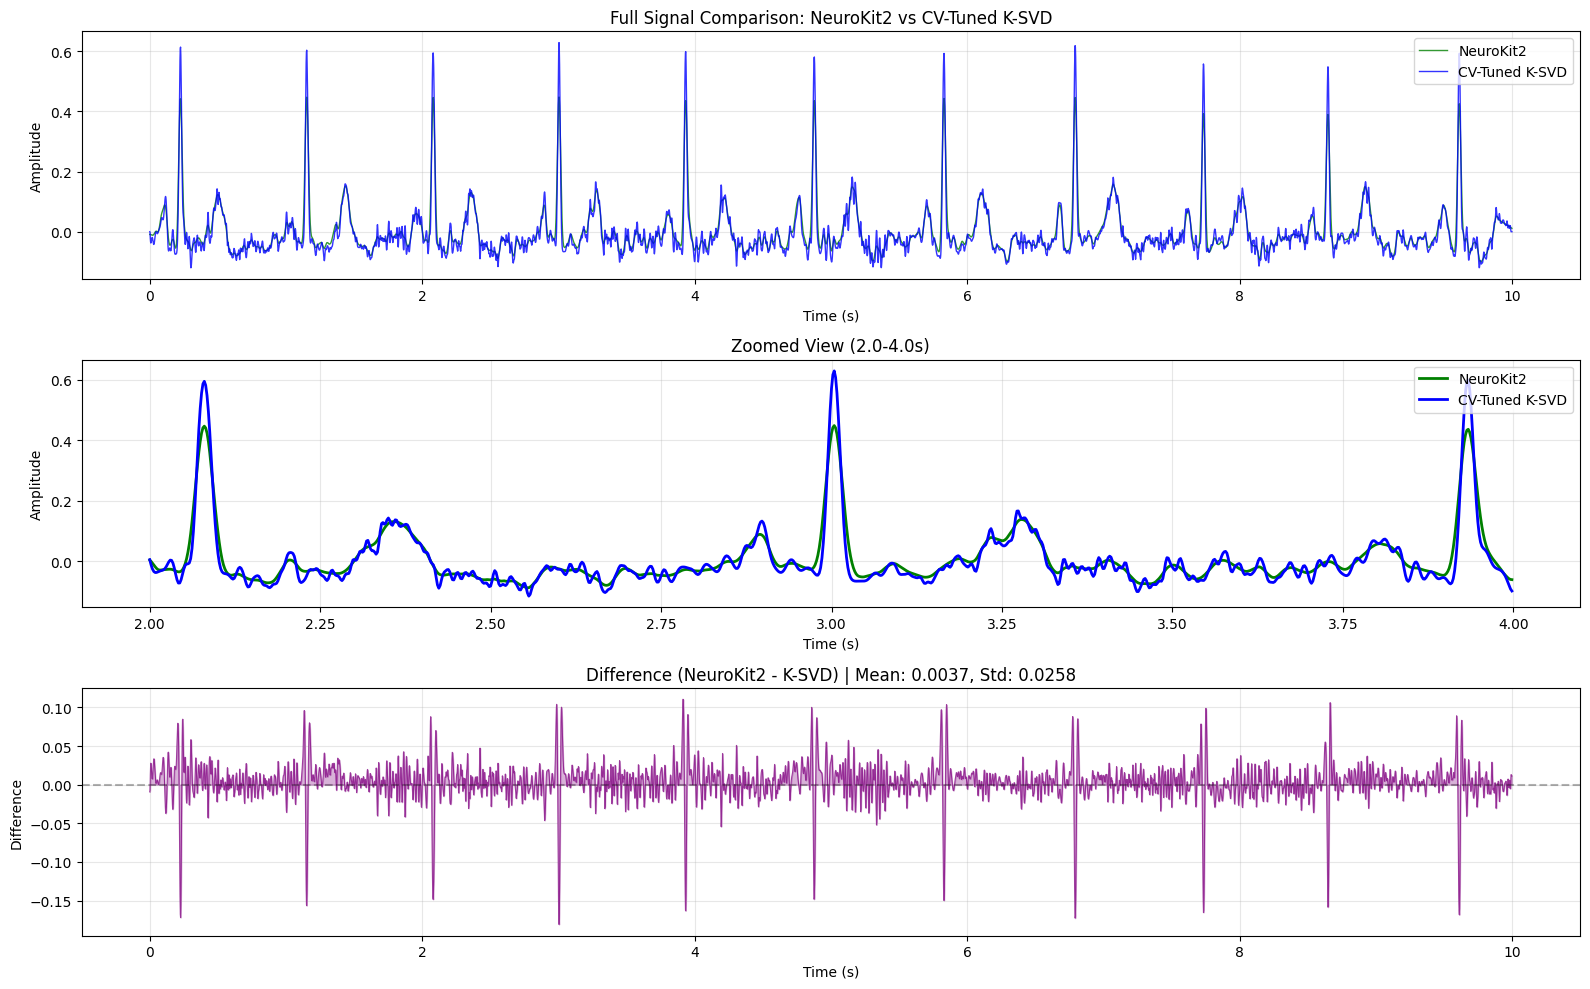


METRICS COMPARISON: NeuroKit2 vs CV-Tuned K-SVD

Metric                NeuroKit2      K-SVD (CV)          Winner
------------------------------------------------------------
Correlation            0.818952        0.850138           K-SVD
PRD (%)                 60.1744         54.7471           K-SVD
RMSE                   0.601744        0.547471           K-SVD
SNR (dB)                   4.41            5.23           K-SVD


In [ ]:
# =============================================================================
# COMPARISON: NeuroKit2 vs CV-Tuned K-SVD
# =============================================================================
fig_compare = plt.figure(figsize=(16, 10))
t_sec = np.arange(len(raw_ecg)) / fs

# Full signal comparison
ax1 = fig_compare.add_subplot(3, 1, 1)
ax1.plot(t_sec, ecg_nk_denoised, 'g-',
         linewidth=1, alpha=0.8, label='NeuroKit2')
ax1.plot(t_sec, signal_optimal, 'b-', linewidth=1,
         alpha=0.8, label='CV-Tuned K-SVD')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Full Signal Comparison: NeuroKit2 vs CV-Tuned K-SVD')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Zoomed comparison (2 seconds)
zoom_start, zoom_end = 2.0, 4.0
idx_start = int(zoom_start * fs)
idx_end = int(zoom_end * fs)
t_zoom = t_sec[idx_start:idx_end]

ax2 = fig_compare.add_subplot(3, 1, 2)
ax2.plot(t_zoom, ecg_nk_denoised[idx_start:idx_end],
         'g-', linewidth=2, label='NeuroKit2')
ax2.plot(t_zoom, signal_optimal[idx_start:idx_end],
         'b-', linewidth=2, label='CV-Tuned K-SVD')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.set_title(f'Zoomed View ({zoom_start}-{zoom_end}s)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Difference plot
ax3 = fig_compare.add_subplot(3, 1, 3)
difference = ecg_nk_denoised - signal_optimal
ax3.plot(t_sec, difference, 'purple', linewidth=0.8, alpha=0.7)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax3.fill_between(t_sec, difference, alpha=0.3, color='purple')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Difference')
ax3.set_title(
    f'Difference (NeuroKit2 - K-SVD) | Mean: {np.mean(difference):.4f}, Std: {np.std(difference):.4f}')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print metrics comparison
print("\n" + "=" * 60)
print("METRICS COMPARISON: NeuroKit2 vs CV-Tuned K-SVD")
print("=" * 60)
nk_metrics = evaluate_denoising(raw_ecg, ecg_nk_denoised)
ksvd_metrics = evaluate_denoising(raw_ecg, signal_optimal)
print(f"\n{'Metric':<15} {'NeuroKit2':>15} {'K-SVD (CV)':>15} {'Winner':>15}")
print("-" * 60)
print(
    f"{'Correlation':<15} {nk_metrics['corr']:>15.6f} {ksvd_metrics['corr']:>15.6f} {'K-SVD' if ksvd_metrics['corr'] > nk_metrics['corr'] else 'NeuroKit2':>15}")
print(
    f"{'PRD (%)':<15} {nk_metrics['prd']:>15.4f} {ksvd_metrics['prd']:>15.4f} {'K-SVD' if ksvd_metrics['prd'] < nk_metrics['prd'] else 'NeuroKit2':>15}")
print(
    f"{'RMSE':<15} {nk_metrics['rmse']:>15.6f} {ksvd_metrics['rmse']:>15.6f} {'K-SVD' if ksvd_metrics['rmse'] < nk_metrics['rmse'] else 'NeuroKit2':>15}")
print(
    f"{'SNR (dB)':<15} {nk_metrics['snr']:>15.2f} {ksvd_metrics['snr']:>15.2f} {'K-SVD' if ksvd_metrics['snr'] > nk_metrics['snr'] else 'NeuroKit2':>15}")

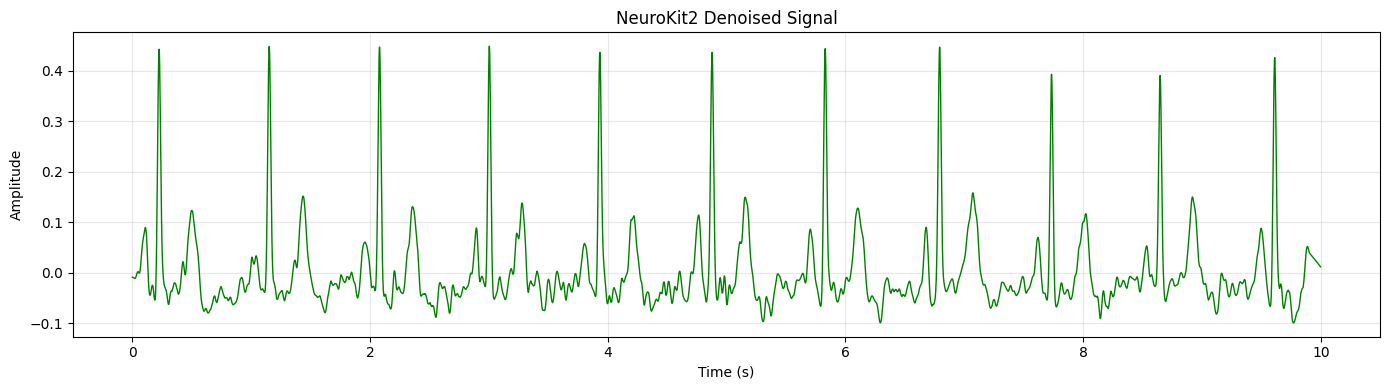

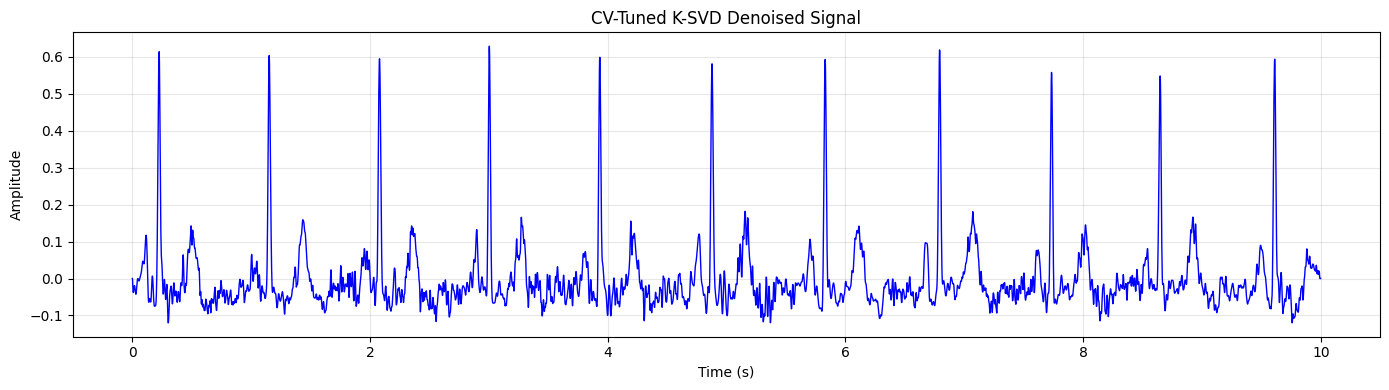

In [ ]:
# =============================================================================
# INDIVIDUAL SIGNAL PLOTS
# =============================================================================
t_sec = np.arange(len(raw_ecg)) / fs

# Plot 1: NeuroKit2 Signal Alone
fig1, ax1 = plt.subplots(figsize=(14, 4))
ax1.plot(t_sec, ecg_nk_denoised, 'g-', linewidth=1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('NeuroKit2 Denoised Signal')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: CV-Tuned K-SVD Signal Alone
fig2, ax2 = plt.subplots(figsize=(14, 4))
ax2.plot(t_sec, signal_optimal, 'b-', linewidth=1)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.set_title('CV-Tuned K-SVD Denoised Signal')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

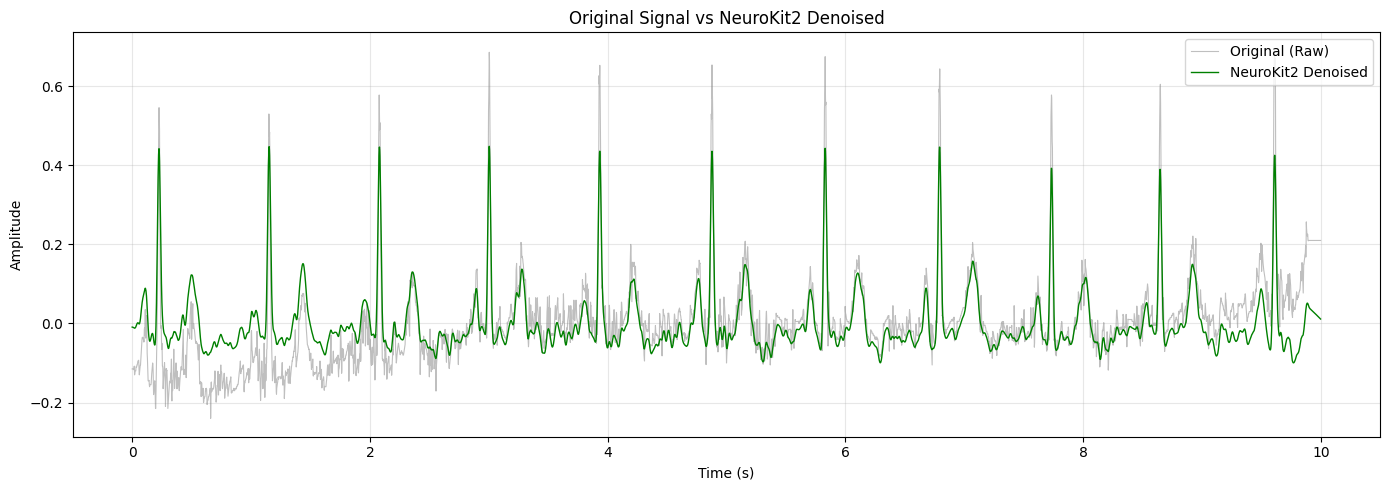

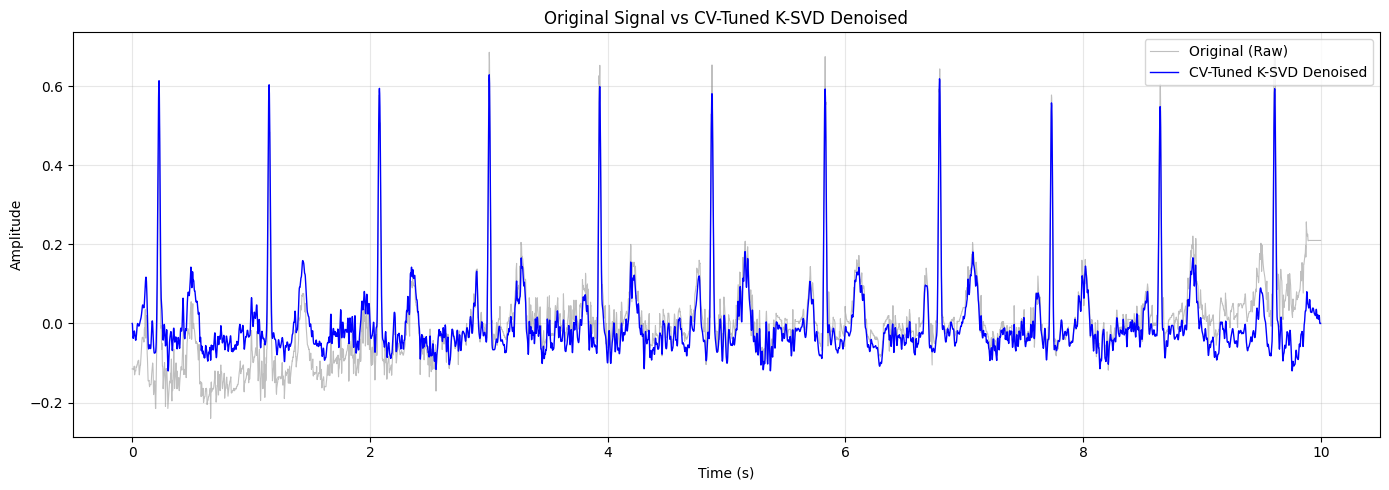

In [ ]:
# =============================================================================
# EACH DENOISED SIGNAL WITH ORIGINAL
# =============================================================================

# Plot 3: NeuroKit2 with Original Signal
fig3, ax3 = plt.subplots(figsize=(14, 5))
ax3.plot(t_sec, raw_ecg, 'gray', alpha=0.5,
         linewidth=0.8, label='Original (Raw)')
ax3.plot(t_sec, ecg_nk_denoised, 'g-', linewidth=1, label='NeuroKit2 Denoised')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.set_title('Original Signal vs NeuroKit2 Denoised')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 4: CV-Tuned K-SVD with Original Signal
fig4, ax4 = plt.subplots(figsize=(14, 5))
ax4.plot(t_sec, raw_ecg, 'gray', alpha=0.5,
         linewidth=0.8, label='Original (Raw)')
ax4.plot(t_sec, signal_optimal, 'b-', linewidth=1,
         label='CV-Tuned K-SVD Denoised')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Amplitude')
ax4.set_title('Original Signal vs CV-Tuned K-SVD Denoised')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Full Dataset Processing Pipeline


In [5]:
# =============================================================================
# STEP 1: LOAD FULL DATASET AND APPLY NEUROKIT2 PREPROCESSING
# =============================================================================
import time
import numpy as np
import pandas as pd
import neurokit2 as nk
import wfdb
import os
import pickle

print("=" * 80)
print("FULL DATASET PROCESSING PIPELINE")
print("=" * 80)

# Create save directory
SAVE_DIR = "preprocessed_data"
os.makedirs(SAVE_DIR, exist_ok=True)
STEP1_FILE = os.path.join(SAVE_DIR, "step1_neurokit2_cleaned.pkl")

# Load database metadata using pandas
print("\n[1] Loading PTB-XL database metadata...")
ptbxl_database = pd.read_csv('ptbxl_database.csv')
df = ptbxl_database.copy()
print(f"    Total records: {len(df)}")

# Check if preprocessed data already exists
if os.path.exists(STEP1_FILE):
    print(f"\n[2] Loading existing NeuroKit2 preprocessed data...")
    with open(STEP1_FILE, 'rb') as f:
        saved_data = pickle.load(f)
    all_signals_cleaned = saved_data['signals']
    all_ecg_ids = saved_data['ecg_ids']
    failed_records = saved_data.get('failed_records', [])
    print(f"    ✓ Loaded {len(all_signals_cleaned)} preprocessed signals")
    print(f"    ECG IDs range: {min(all_ecg_ids)} to {max(all_ecg_ids)}")
    print(f"    Signal shape: {all_signals_cleaned[0].shape}")
    print(f"    Failed records: {len(failed_records)}")
else:
    # Filter for 500 Hz records only
    print("\n[2] Filtering for 500 Hz records...")
    df_500hz = df[df['filename_hr'].notna()].copy()
    print(f"    Records with 500 Hz: {len(df_500hz)}")

    # Process all records with NeuroKit2
    print("\n[3] Processing all records with NeuroKit2...")
    print("    This will take several minutes...")

    all_signals_cleaned = []
    all_ecg_ids = []
    failed_records = []

    start_time = time.time()
    progress_interval = max(1, len(df_500hz) // 20)

    for idx, row in df_500hz.iterrows():
        try:
            # Load 500 Hz record using wfdb
            record_path = row["filename_hr"]
            record = wfdb.rdrecord(record_path)

            # Get signal (shape: [samples, 12_leads])
            signal_12_leads = record.p_signal

            # Apply NeuroKit2 preprocessing to each lead
            cleaned_leads = []
            for lead_idx in range(12):
                lead_signal = signal_12_leads[:, lead_idx]
                # NeuroKit2 preprocessing: highpass 0.5 Hz (Butterworth filter)
                cleaned_lead = nk.signal_filter(lead_signal, sampling_rate=500,
                                                highcut=None, lowcut=0.5, method='butterworth', order=5)
                cleaned_leads.append(cleaned_lead)

            # Stack back to [samples, 12_leads]
            cleaned_12_leads = np.column_stack(cleaned_leads)
            all_signals_cleaned.append(cleaned_12_leads)
            all_ecg_ids.append(row['ecg_id'])

            # Progress update
            if (len(all_signals_cleaned)) % progress_interval == 0 or len(all_signals_cleaned) == 1:
                elapsed = time.time() - start_time
                remaining = elapsed / \
                    len(all_signals_cleaned) * \
                    (len(df_500hz) - len(all_signals_cleaned))
                print(f"    Progress: {len(all_signals_cleaned)}/{len(df_500hz)} "
                      f"({100*len(all_signals_cleaned)/len(df_500hz):.1f}%) - "
                      f"Elapsed: {elapsed:.1f}s, Remaining: ~{remaining:.1f}s")

        except Exception as e:
            failed_records.append((row['ecg_id'], str(e)))
            continue

    total_time = time.time() - start_time
    print(f"\n    ✓ Preprocessing complete in {total_time:.1f} seconds")
    print(f"    Successfully processed: {len(all_signals_cleaned)}")
    print(f"    Failed: {len(failed_records)}")

    # Debug: Print first 5 failed records with error messages
    if failed_records:
        print(f"\n    First 5 failed records:")
        for ecg_id, error in failed_records[:5]:
            print(f"      ECG ID {ecg_id}: {error}")

    # SAVE STEP 1 DATA
    print(f"\n    💾 Saving NeuroKit2 preprocessed data to {STEP1_FILE}...")
    with open(STEP1_FILE, 'wb') as f:
        pickle.dump({
            'signals': all_signals_cleaned,
            'ecg_ids': all_ecg_ids,
            'failed_records': failed_records
        }, f)
    print(f"    ✓ Step 1 data saved successfully!")

FULL DATASET PROCESSING PIPELINE

[1] Loading PTB-XL database metadata...
    Total records: 21799

[2] Filtering for 500 Hz records...
    Records with 500 Hz: 21799

[3] Processing all records with NeuroKit2...
    This will take several minutes...
    Progress: 1/21799 (0.0%) - Elapsed: 0.1s, Remaining: ~1124.0s
    Progress: 1089/21799 (5.0%) - Elapsed: 23.6s, Remaining: ~448.5s
    Progress: 2178/21799 (10.0%) - Elapsed: 50.3s, Remaining: ~452.8s
    Progress: 3267/21799 (15.0%) - Elapsed: 75.3s, Remaining: ~427.3s
    Progress: 4356/21799 (20.0%) - Elapsed: 105.2s, Remaining: ~421.4s
    Progress: 5445/21799 (25.0%) - Elapsed: 134.0s, Remaining: ~402.6s
    Progress: 6534/21799 (30.0%) - Elapsed: 160.0s, Remaining: ~373.8s
    Progress: 7623/21799 (35.0%) - Elapsed: 186.4s, Remaining: ~346.7s
    Progress: 8712/21799 (40.0%) - Elapsed: 215.9s, Remaining: ~324.3s
    Progress: 9801/21799 (45.0%) - Elapsed: 243.5s, Remaining: ~298.0s
    Progress: 10890/21799 (50.0%) - Elapsed: 273

Z Score Normalization 

In [ ]:
# =============================================================================
# STEP 2: Z-SCORE NORMALIZATION (GLOBAL PER LEAD)
# =============================================================================
import numpy as np
import os
import pickle

SAVE_DIR = "preprocessed_data"
STEP2_FILE = os.path.join(SAVE_DIR, "step2_normalized_signals.pkl")

# Create directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

if os.path.exists(STEP2_FILE):
    print("\n[4] Loading existing normalized data...")
    with open(STEP2_FILE, 'rb') as f:
        saved_data = pickle.load(f)
    all_signals_normalized = saved_data['signals']
    # Load ecg_ids if available
    all_ecg_ids = saved_data.get('ecg_ids', all_ecg_ids)
    global_mean = saved_data['global_mean']
    global_std = saved_data['global_std']
    print(f"    ✓ Loaded {len(all_signals_normalized)} normalized signals")
    print(f"    Global mean per lead: {global_mean.round(4)}")
    print(f"    Global std per lead: {global_std.round(4)}")
else:
    print("\n[4] Applying Z-Score normalization (global per lead)...")
    print("    Computing mean and std for each lead across ALL signals...\n")

    # Welford's online algorithm for memory efficiency
    n_leads = 12
    n_total = 0
    running_mean = np.zeros(n_leads)
    running_m2 = np.zeros(n_leads)

    for signal in all_signals_cleaned:
        for row in signal:
            n_total += 1
            delta = row - running_mean
            running_mean += delta / n_total
            delta2 = row - running_mean
            running_m2 += delta * delta2

    global_mean = running_mean
    global_std = np.sqrt(running_m2 / n_total)
    global_std[global_std < 1e-10] = 1.0

    print(f"    Total time points processed: {n_total}")
    print(f"    Global mean per lead: {global_mean.round(4)}")
    print(f"    Global std per lead: {global_std.round(4)}")

    # Apply normalization
    all_signals_normalized = []
    for signal in all_signals_cleaned:
        signal_normalized = (signal - global_mean) / global_std
        all_signals_normalized.append(signal_normalized)

    print(f"\n    ✓ Global Z-Score normalization complete")
    print(f"    Total signals normalized: {len(all_signals_normalized)}")

    # SAVE STEP 2 DATA
    print(f"\n    💾 Saving normalized data to {STEP2_FILE}...")
    with open(STEP2_FILE, 'wb') as f:
        pickle.dump({
            'signals': all_signals_normalized,
            'ecg_ids': all_ecg_ids,
            'global_mean': global_mean,
            'global_std': global_std
        }, f)
    print(f"    ✓ Step 2 data saved successfully!")


[4] Applying Z-Score normalization (global per lead)...
    Computing mean and std for each lead across ALL signals...



PCA

In [2]:
# =============================================================================
# STEP 3: PCA FOR DIMENSIONALITY REDUCTION (12 LEADS → FEWER COMPONENTS)
# =============================================================================
import numpy as np
import os
import pickle
from sklearn.decomposition import PCA

SAVE_DIR = "preprocessed_data"
STEP3_FILE = os.path.join(SAVE_DIR, "step3_pca_signals.pkl")

# Create directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

if os.path.exists(STEP3_FILE):
    print("\n[5] Loading existing PCA data...")
    with open(STEP3_FILE, 'rb') as f:
        saved_data = pickle.load(f)
    all_signals_pca = saved_data['signals_pca']
    all_ecg_ids = saved_data['ecg_ids']
    pca_chosen = saved_data['pca_model']
    n_components_95 = saved_data['n_components']
    print(f"    ✓ Loaded {len(all_signals_pca)} PCA-transformed signals")
    print(f"    Components: {n_components_95}")
    print(
        f"    Variance explained: {sum(pca_chosen.explained_variance_ratio_)*100:.2f}%")
else:
    print("\n[5] Applying PCA for dimensionality reduction...")

    # Reshape all signals for PCA: concatenate all time points from all records
    print("    Concatenating all signals for PCA fitting...")
    all_timepoints = np.vstack(all_signals_normalized)
    print(f"    Total time points: {all_timepoints.shape[0]}")
    print(f"    Features (leads): {all_timepoints.shape[1]}")

    # Fit PCA
    print("    Fitting PCA...")
    pca = PCA(n_components=12)
    pca.fit(all_timepoints)

    # Display variance explained
    print(f"\n    Variance explained by each component:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        cumsum = np.sum(pca.explained_variance_ratio_[:i+1])
        print(f"      PC{i+1}: {var*100:.2f}% (Cumulative: {cumsum*100:.2f}%)")

    # Choose number of components (95% variance)
    n_components_95 = np.argmax(
        np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
    n_components_99 = np.argmax(
        np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1

    print(f"\n    Components needed for 95% variance: {n_components_95}")
    print(f"    Components needed for 99% variance: {n_components_99}")

    # Transform all signals with chosen number of components
    print(
        f"\n    Transforming all signals to {n_components_95} principal components...")
    pca_chosen = PCA(n_components=n_components_95)
    pca_chosen.fit(all_timepoints)

    # Transform each signal individually
    all_signals_pca = []
    for signal in all_signals_normalized:
        signal_pca = pca_chosen.transform(signal)
        all_signals_pca.append(signal_pca)

    print(f"    ✓ Reduced from 12 leads to {n_components_95} components")
    print(f"    Final shape per record: [5000, {n_components_95}]")
    print(f"\n    Total processed records: {len(all_signals_pca)}")

    # SAVE STEP 3 DATA
    print(f"\n    💾 Saving PCA data to {STEP3_FILE}...")
    with open(STEP3_FILE, 'wb') as f:
        pickle.dump({
            'signals_pca': all_signals_pca,
            'ecg_ids': all_ecg_ids,
            'pca_model': pca_chosen,
            'n_components': n_components_95
        }, f)
    print(f"    ✓ Step 3 data saved successfully!")


[5] Applying PCA for dimensionality reduction...
    Concatenating all signals for PCA fitting...


NameError: name 'all_signals_normalized' is not defined

Plotting first 5 Principal Components for sample ECG records...


NameError: name 'all_signals_pca' is not defined

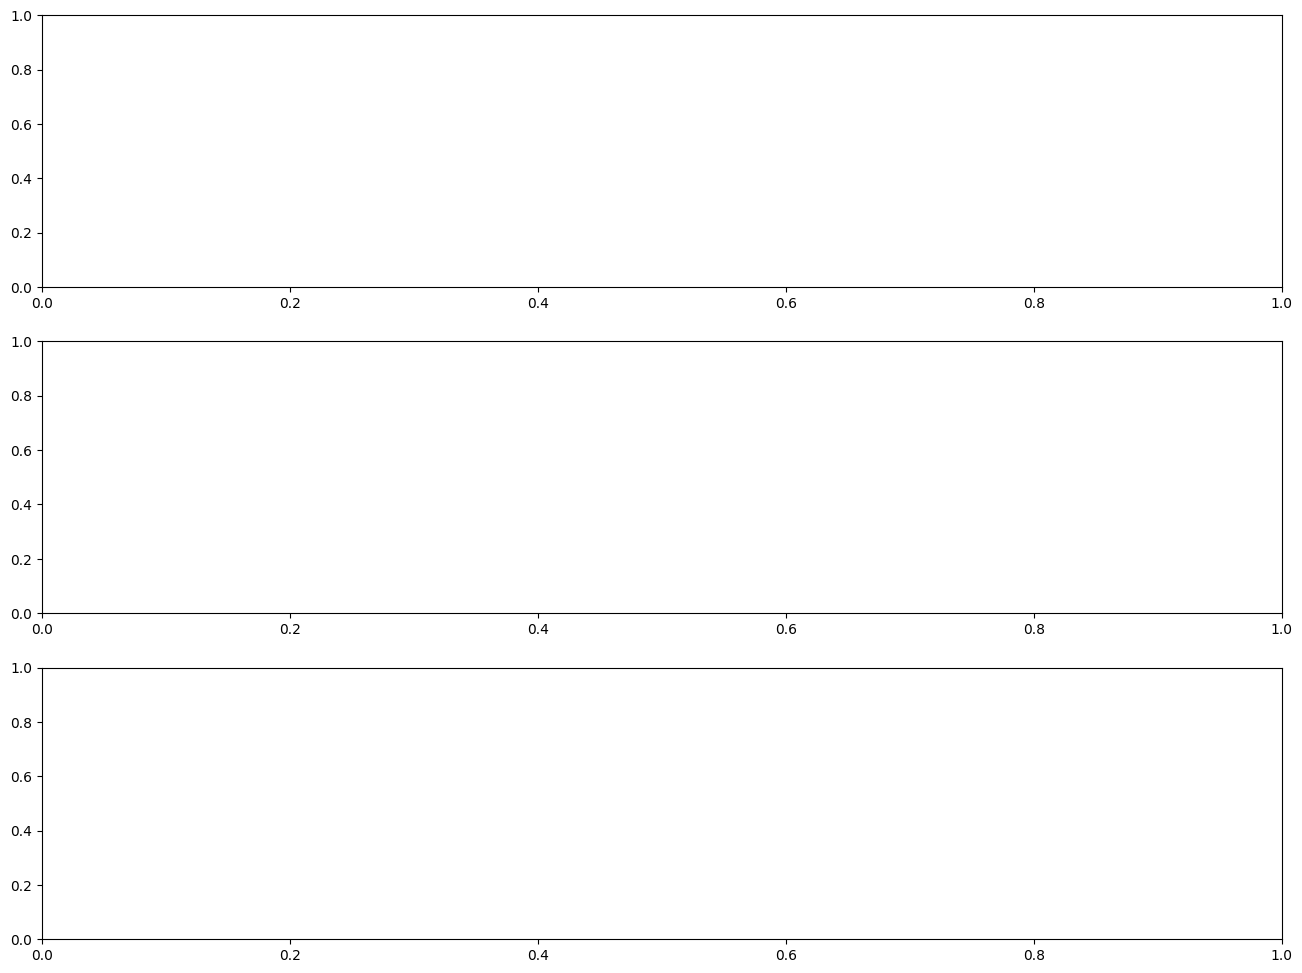

In [ ]:
# =============================================================================
# VISUALIZE FIRST 5 PRINCIPAL COMPONENTS
# =============================================================================
import matplotlib.pyplot as plt

print("Plotting first 5 Principal Components for sample ECG records...")

# Select a few sample records to visualize
sample_indices = [0, 1, 2]  # First 3 records
fs = 500  # 500 Hz sampling rate

fig, axes = plt.subplots(len(sample_indices), 1,
                         figsize=(16, 4*len(sample_indices)))

for i, sample_idx in enumerate(sample_indices):
    signal_pca = all_signals_pca[sample_idx]
    ecg_id = all_ecg_ids[sample_idx]
    t_sec = np.arange(signal_pca.shape[0]) / fs

    ax = axes[i] if len(sample_indices) > 1 else axes

    # Plot first 5 PCs
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    for pc_idx in range(min(5, signal_pca.shape[1])):
        ax.plot(t_sec, signal_pca[:, pc_idx], color=colors[pc_idx],
                linewidth=1, alpha=0.8, label=f'PC{pc_idx+1}')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (normalized)')
    ax.set_title(
        f'ECG ID {ecg_id} - First 5 Principal Components', fontweight='bold')
    ax.legend(loc='upper right', ncol=5)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Individual PC plots for the first sample
print("\nDetailed view of each PC for ECG ID", all_ecg_ids[0])

fig2, axes2 = plt.subplots(5, 1, figsize=(16, 12), sharex=True)
signal_pca_sample = all_signals_pca[0]
t_sec = np.arange(signal_pca_sample.shape[0]) / fs

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
pc_labels = ['PC1 (Dominant cardiac activity)',
             'PC2 (Secondary cardiac features)',
             'PC3 (Tertiary features)',
             'PC4 (Minor variations)',
             'PC5 (Residual patterns)']

for pc_idx in range(5):
    axes2[pc_idx].plot(t_sec, signal_pca_sample[:, pc_idx],
                       color=colors[pc_idx], linewidth=1)
    axes2[pc_idx].set_ylabel(f'PC{pc_idx+1}')
    axes2[pc_idx].set_title(pc_labels[pc_idx], fontsize=10, loc='left')
    axes2[pc_idx].grid(True, alpha=0.3)

    # Add variance explained
    var_exp = pca_chosen.explained_variance_ratio_[pc_idx] * 100
    axes2[pc_idx].text(0.98, 0.95, f'Variance: {var_exp:.1f}%',
                       transform=axes2[pc_idx].transAxes,
                       ha='right', va='top', fontsize=9,
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes2[-1].set_xlabel('Time (s)')
fig2.suptitle(f'Individual Principal Components - ECG ID {all_ecg_ids[0]}',
              fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n✓ Visualization complete!")
print(
    f"  Total variance captured by first 5 PCs: {sum(pca_chosen.explained_variance_ratio_[:5])*100:.2f}%")